In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.ensemble import RandomForestClassifier

In [2]:
data = pd.read_csv("7.csv")
data.head()

species  length  weight  w_l_ratio
0  Anabas testudineus   10.66    3.45       0.32
1  Anabas testudineus    6.91    3.27       0.47
2  Anabas testudineus    8.38    3.46       0.41
3  Anabas testudineus    7.57    3.36       0.44
4  Anabas testudineus   10.83    3.38       0.31

In [3]:
df = data.drop(columns=["w_l_ratio"])
print(df)

                    species  length  weight
0        Anabas testudineus   10.66    3.45
1        Anabas testudineus    6.91    3.27
2        Anabas testudineus    8.38    3.46
3        Anabas testudineus    7.57    3.36
4        Anabas testudineus   10.83    3.38
...                     ...     ...     ...
4075  Sillaginopsis panijus   30.56    6.12
4076  Sillaginopsis panijus   29.66    6.11
4077  Sillaginopsis panijus   32.81    6.25
4078  Sillaginopsis panijus   29.78    6.11
4079  Sillaginopsis panijus   31.62    6.14

[4080 rows x 3 columns]


In [12]:
df["col0_encoded"] = df.iloc[:, 0].astype("category").cat.codes + 1
print(df)

                    species  length  weight  col0_encoded
0        Anabas testudineus   10.66    3.45             1
1        Anabas testudineus    6.91    3.27             1
2        Anabas testudineus    8.38    3.46             1
3        Anabas testudineus    7.57    3.36             1
4        Anabas testudineus   10.83    3.38             1
...                     ...     ...     ...           ...
4075  Sillaginopsis panijus   30.56    6.12             9
4076  Sillaginopsis panijus   29.66    6.11             9
4077  Sillaginopsis panijus   32.81    6.25             9
4078  Sillaginopsis panijus   29.78    6.11             9
4079  Sillaginopsis panijus   31.62    6.14             9

[4080 rows x 4 columns]


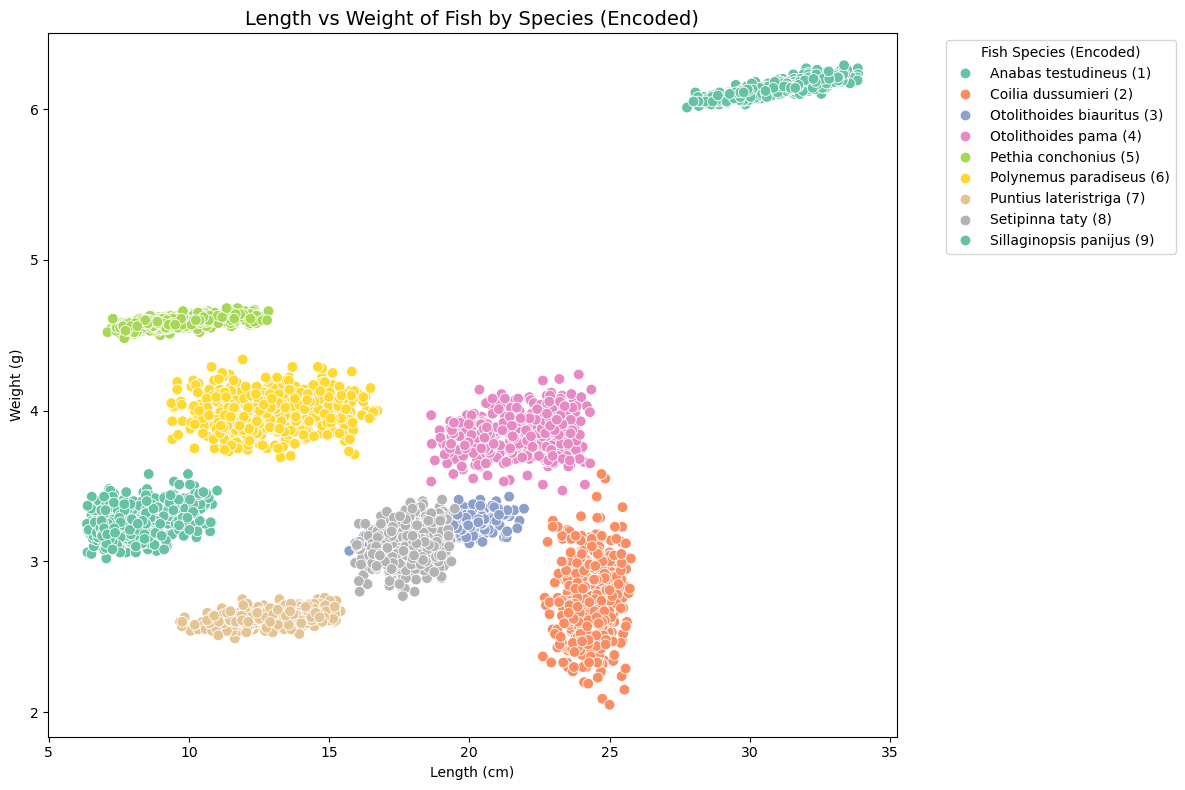

In [13]:
df['species_label'] = df.apply(lambda row: f"{row['species']} ({row['col0_encoded']})", axis=1)
plt.figure(figsize=(12, 8))
sns.scatterplot(data=df, x='length', y='weight', hue='species_label', palette='Set2', s=60)
plt.title("Length vs Weight of Fish by Species (Encoded)", fontsize=14)
plt.xlabel("Length (cm)")
plt.ylabel("Weight (g)")
plt.legend(title="Fish Species (Encoded)", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


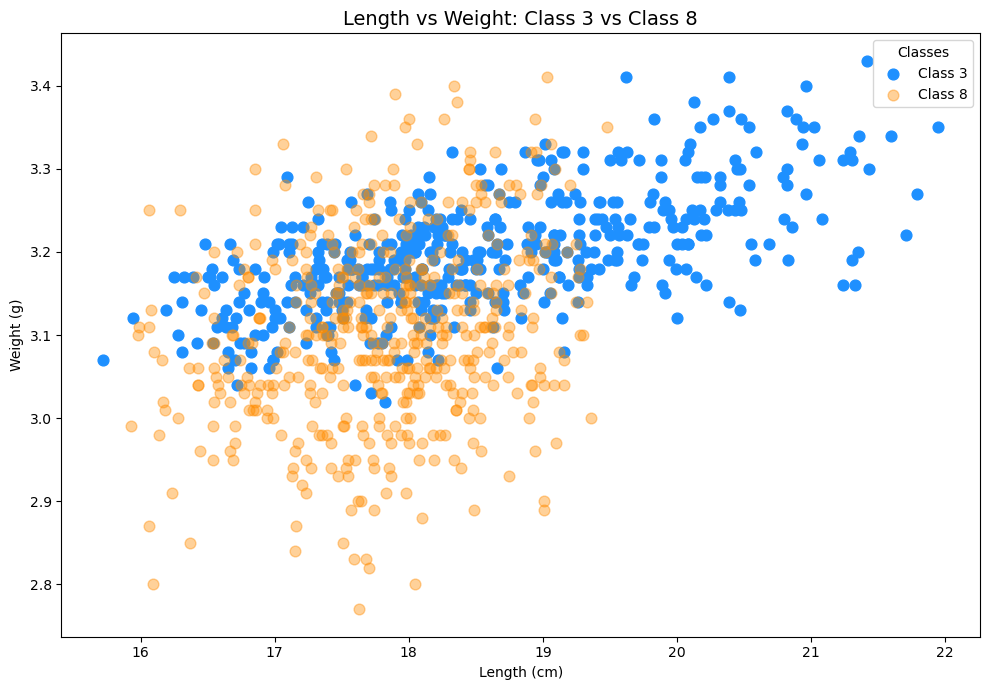

In [14]:
plt.figure(figsize=(10, 7))

# Filter data
class_3 = df[df['col0_encoded'] == 3]
class_8 = df[df['col0_encoded'] == 8]

# Plot class 3 (opaque)
plt.scatter(class_3['length'], class_3['weight'], label='Class 3', color='dodgerblue', alpha=1.0, s=60)

# Plot class 8 (semi-transparent)
plt.scatter(class_8['length'], class_8['weight'], label='Class 8', color='darkorange', alpha=0.4, s=60)

plt.title("Length vs Weight: Class 3 vs Class 8", fontsize=14)
plt.xlabel("Length (cm)")
plt.ylabel("Weight (g)")
plt.legend(title="Classes")
plt.tight_layout()
plt.show()

In [17]:
# Extract only rows where 'col0_encoded' is 3 or 8
df_3_8 = df[df['col0_encoded'].isin([3, 8])].copy()

# Reset the index for cleanliness
df_3_8.reset_index(drop=True, inplace=True)

# Display the first few rows
print(df_3_8.head())

                  species  length  weight  col0_encoded  \
0  Otolithoides biauritus   20.07    3.18             3   
1  Otolithoides biauritus   17.21    3.23             3   
2  Otolithoides biauritus   16.82    3.08             3   
3  Otolithoides biauritus   17.72    3.18             3   
4  Otolithoides biauritus   21.43    3.30             3   

                species_label  
0  Otolithoides biauritus (3)  
1  Otolithoides biauritus (3)  
2  Otolithoides biauritus (3)  
3  Otolithoides biauritus (3)  
4  Otolithoides biauritus (3)  


In [21]:
df_3_8

species  length  weight  col0_encoded  \
0    Otolithoides biauritus   20.07    3.18             3   
1    Otolithoides biauritus   17.21    3.23             3   
2    Otolithoides biauritus   16.82    3.08             3   
3    Otolithoides biauritus   17.72    3.18             3   
4    Otolithoides biauritus   21.43    3.30             3   
..                      ...     ...     ...           ...   
943          Setipinna taty   17.98    3.17             8   
944          Setipinna taty   17.23    3.20             8   
945          Setipinna taty   19.01    3.04             8   
946          Setipinna taty   17.97    3.35             8   
947          Setipinna taty   18.03    3.04             8   

                  species_label  
0    Otolithoides biauritus (3)  
1    Otolithoides biauritus (3)  
2    Otolithoides biauritus (3)  
3    Otolithoides biauritus (3)  
4    Otolithoides biauritus (3)  
..                          ...  
943          Setipinna taty (8)  
944          Setipinna taty (8)  
945          Setipinna taty (8)  
946          Setipinna taty (8)  
947          Setipinna taty (8)  

[948 rows x 5 columns]

In [22]:
df_3_8 = df_3_8.drop(columns=["species", "species_label"])

In [23]:
df_3_8

length  weight  col0_encoded
0     20.07    3.18             3
1     17.21    3.23             3
2     16.82    3.08             3
3     17.72    3.18             3
4     21.43    3.30             3
..      ...     ...           ...
943   17.98    3.17             8
944   17.23    3.20             8
945   19.01    3.04             8
946   17.97    3.35             8
947   18.03    3.04             8

[948 rows x 3 columns]

In [24]:
train_data, temp_data = train_test_split(df_3_8, test_size=0.3, stratify=df_3_8.iloc[:, -1], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data.iloc[:, -1], random_state=42)

In [25]:
train_data

length  weight  col0_encoded
760   16.80    3.09             8
558   18.05    2.80             8
324   20.94    3.35             3
177   19.83    3.23             3
125   16.82    3.06             3
..      ...     ...           ...
507   17.59    3.23             8
780   19.25    3.21             8
593   17.45    3.12             8
723   17.70    2.82             8
835   18.74    3.05             8

[663 rows x 3 columns]

/home/imangi/.local/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [16:00:06] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Validation Results:
              precision    recall  f1-score   support

           3       0.70      0.74      0.72        70
           8       0.74      0.69      0.71        72

    accuracy                           0.72       142
   macro avg       0.72      0.72      0.72       142
weighted avg       0.72      0.72      0.72       142



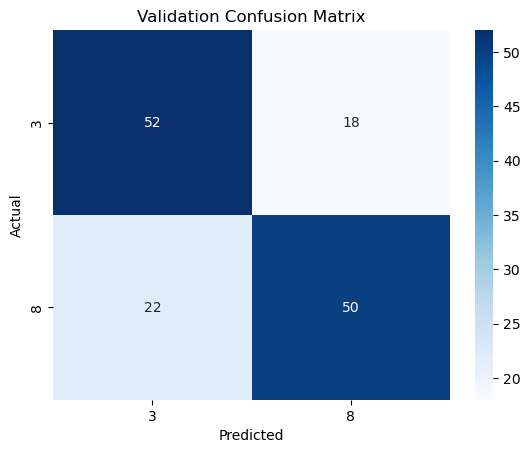

Test Results:
              precision    recall  f1-score   support

           3       0.74      0.77      0.76        71
           8       0.77      0.74      0.75        72

    accuracy                           0.76       143
   macro avg       0.76      0.76      0.76       143
weighted avg       0.76      0.76      0.76       143



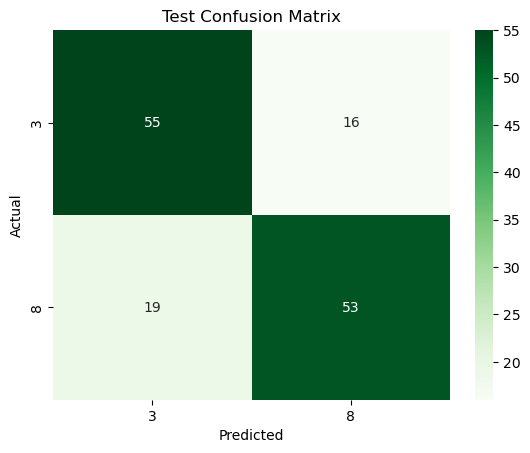

In [28]:
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix

# === Remap labels: 3 → 0, 8 → 1 ===
label_mapping = {3: 0, 8: 1}
rev_mapping = {0: 3, 1: 8}  # for decoding back later if needed

# Extract features and mapped targets
X_train = train_data[['length', 'weight']]
y_train = train_data['col0_encoded'].map(label_mapping)

X_val = val_data[['length', 'weight']]
y_val = val_data['col0_encoded'].map(label_mapping)

X_test = test_data[['length', 'weight']]
y_test = test_data['col0_encoded'].map(label_mapping)

# === Train XGBoost model ===
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
model.fit(X_train, y_train)

# === Evaluate on validation set ===
val_preds = model.predict(X_val)

print("Validation Results:")
print(classification_report(y_val.map(rev_mapping), [rev_mapping[p] for p in val_preds]))

# Confusion Matrix (Validation)
val_cm = confusion_matrix(y_val.map(rev_mapping), [rev_mapping[p] for p in val_preds])
sns.heatmap(val_cm, annot=True, fmt='d', cmap='Blues', xticklabels=[3,8], yticklabels=[3,8])
plt.title('Validation Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# === Evaluate on test set ===
test_preds = model.predict(X_test)

print("Test Results:")
print(classification_report(y_test.map(rev_mapping), [rev_mapping[p] for p in test_preds]))

# Confusion Matrix (Test)
test_cm = confusion_matrix(y_test.map(rev_mapping), [rev_mapping[p] for p in test_preds])
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Greens', xticklabels=[3,8], yticklabels=[3,8])
plt.title('Test Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Logistic Regression Validation Accuracy: 0.6690140845070423
              precision    recall  f1-score   support

           3       0.68      0.63      0.65        70
           8       0.66      0.71      0.68        72

    accuracy                           0.67       142
   macro avg       0.67      0.67      0.67       142
weighted avg       0.67      0.67      0.67       142



/home/imangi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


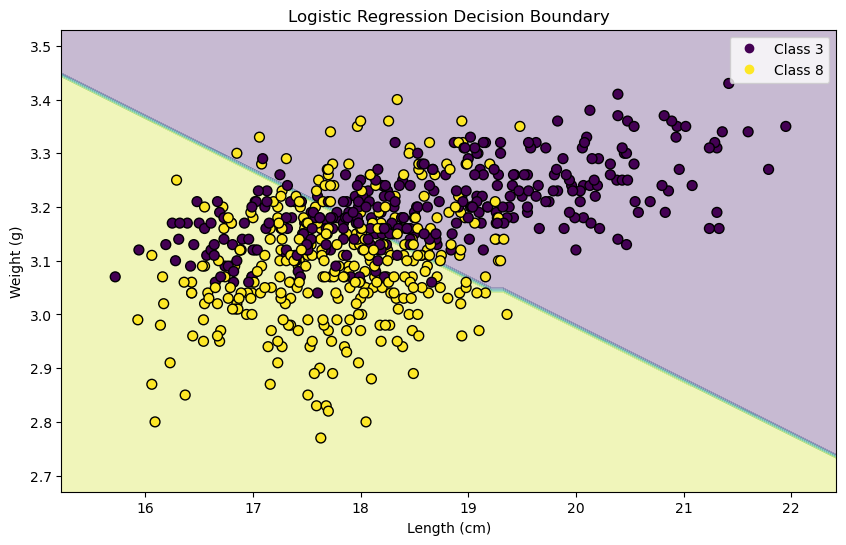

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# Features and target
X_train = train_data[['length', 'weight']]
y_train = train_data['col0_encoded']
X_val = val_data[['length', 'weight']]
y_val = val_data['col0_encoded']
X_test = test_data[['length', 'weight']]
y_test = test_data['col0_encoded']

# Train the model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = log_reg.predict(X_val)
print("Logistic Regression Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Plot decision boundary
def plot_decision_boundary(model, X, y, title="Decision Boundary"):
    x_min, x_max = X['length'].min() - 0.5, X['length'].max() + 0.5
    y_min, y_max = X['weight'].min() - 0.1, X['weight'].max() + 0.1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.01))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Plot the points
    scatter = plt.scatter(X['length'], X['weight'], c=y, edgecolor='k', s=50)
    
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.title(title)
    plt.legend(handles=scatter.legend_elements()[0], labels=['Class 3', 'Class 8'])
    plt.show()

plot_decision_boundary(log_reg, X_train, y_train, "Logistic Regression Decision Boundary")


SVM Linear Kernel Validation Accuracy: 0.6971830985915493
              precision    recall  f1-score   support

           3       0.68      0.73      0.70        70
           8       0.72      0.67      0.69        72

    accuracy                           0.70       142
   macro avg       0.70      0.70      0.70       142
weighted avg       0.70      0.70      0.70       142



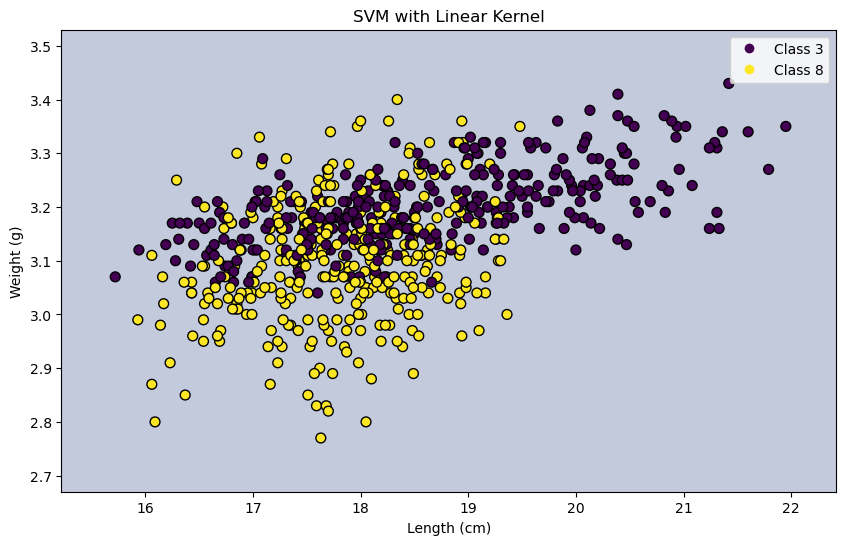


SVM RBF Kernel Validation Accuracy: 0.7464788732394366
              precision    recall  f1-score   support

           3       0.68      0.90      0.78        70
           8       0.86      0.60      0.70        72

    accuracy                           0.75       142
   macro avg       0.77      0.75      0.74       142
weighted avg       0.77      0.75      0.74       142



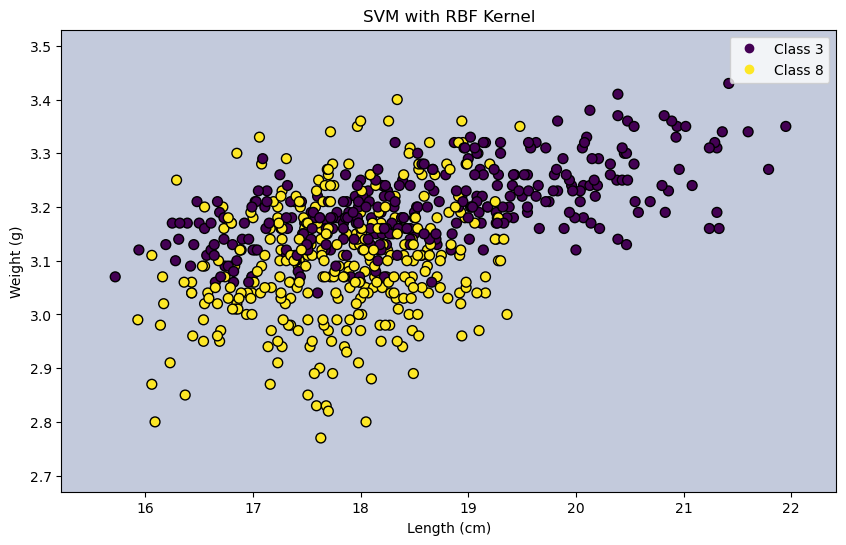


SVM Polynomial Kernel Validation Accuracy: 0.6197183098591549
              precision    recall  f1-score   support

           3       0.71      0.39      0.50        70
           8       0.59      0.85      0.69        72

    accuracy                           0.62       142
   macro avg       0.65      0.62      0.60       142
weighted avg       0.65      0.62      0.60       142



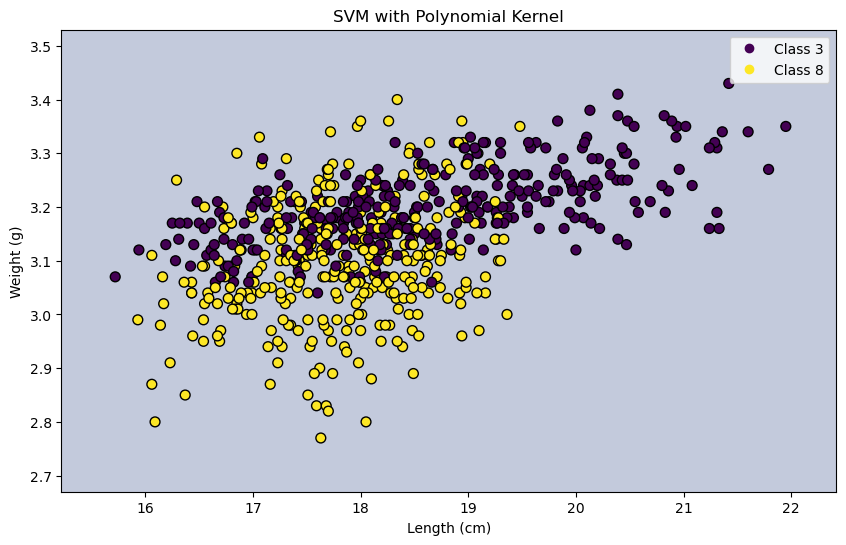

In [30]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Train SVM with different kernels
svm_models = {
    'Linear': SVC(kernel='linear', C=1, random_state=42),
    'RBF': SVC(kernel='rbf', C=1, gamma='scale', random_state=42),
    'Polynomial': SVC(kernel='poly', degree=3, C=1, random_state=42)
}

for name, model in svm_models.items():
    model.fit(X_train_scaled, y_train)
    y_val_pred = model.predict(X_val_scaled)
    print(f"\nSVM {name} Kernel Validation Accuracy:", accuracy_score(y_val, y_val_pred))
    print(classification_report(y_val, y_val_pred))
    
    # Convert scaled data back to original for visualization
    X_train_orig = pd.DataFrame(scaler.inverse_transform(X_train_scaled), 
                               columns=['length', 'weight'])
    plot_decision_boundary(model, X_train_orig, y_train, f"SVM with {name} Kernel")



Random Forest Validation Accuracy: 0.7183098591549296
              precision    recall  f1-score   support

           3       0.67      0.83      0.74        70
           8       0.79      0.61      0.69        72

    accuracy                           0.72       142
   macro avg       0.73      0.72      0.72       142
weighted avg       0.73      0.72      0.72       142


Feature Importance:
  Feature  Importance
1  weight    0.583915
0  length    0.416085


/home/imangi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


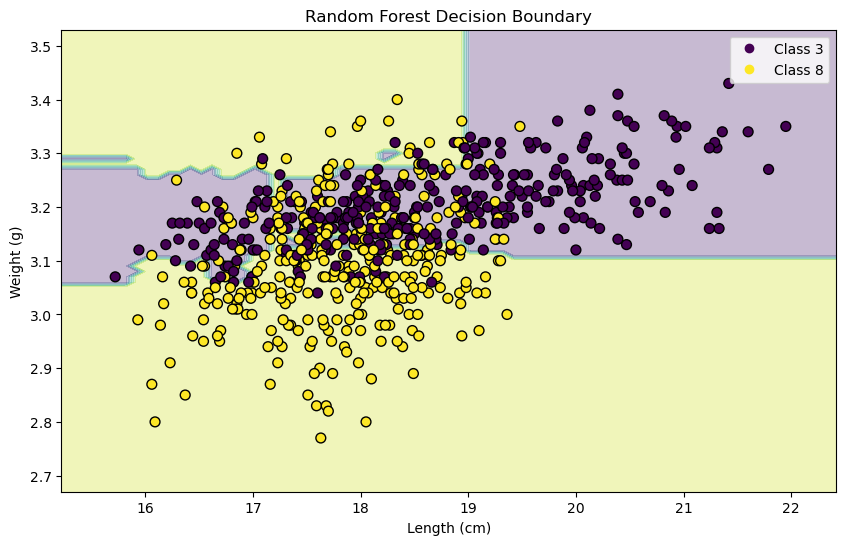

In [31]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf.fit(X_train, y_train)

# Evaluate
y_val_pred = rf.predict(X_val)
print("\nRandom Forest Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

# Plot decision boundary
plot_decision_boundary(rf, X_train, y_train, "Random Forest Decision Boundary")


In [32]:
from sklearn.ensemble import GradientBoostingClassifier

# Train Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)

# Evaluate
y_val_pred = gb.predict(X_val)
print("\nGradient Boosting Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))



Gradient Boosting Validation Accuracy: 0.7183098591549296
              precision    recall  f1-score   support

           3       0.69      0.77      0.73        70
           8       0.75      0.67      0.71        72

    accuracy                           0.72       142
   macro avg       0.72      0.72      0.72       142
weighted avg       0.72      0.72      0.72       142



KNN (k=3) Validation Accuracy: 0.6761
KNN (k=5) Validation Accuracy: 0.7394
KNN (k=7) Validation Accuracy: 0.7324
KNN (k=9) Validation Accuracy: 0.7394
KNN (k=11) Validation Accuracy: 0.7042


/home/imangi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


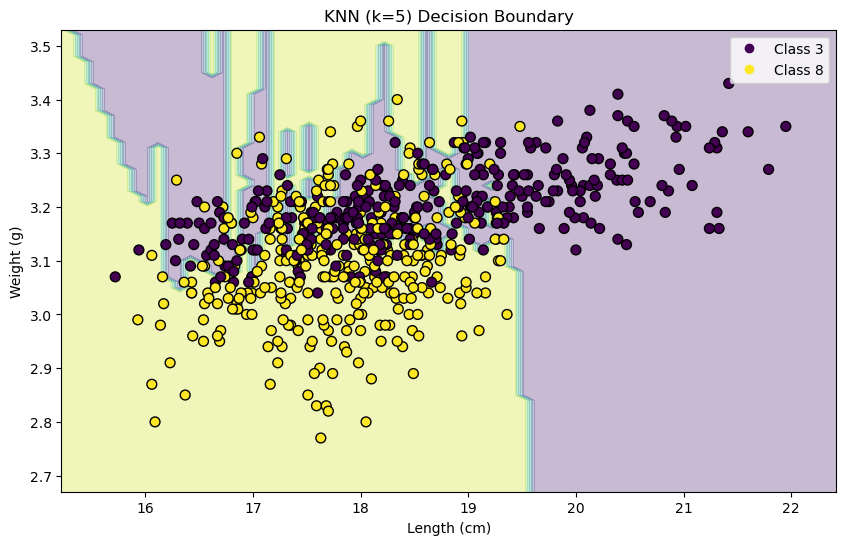

In [33]:
from sklearn.neighbors import KNeighborsClassifier

# Train KNN with different k values
k_values = [3, 5, 7, 9, 11]
best_k = 0
best_accuracy = 0

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_val_pred = knn.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    print(f"KNN (k={k}) Validation Accuracy: {accuracy:.4f}")
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

# Train with best k
best_knn = KNeighborsClassifier(n_neighbors=best_k)
best_knn.fit(X_train, y_train)
plot_decision_boundary(best_knn, X_train, y_train, f"KNN (k={best_k}) Decision Boundary")


In [34]:
from sklearn.neural_network import MLPClassifier

# Train neural network
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000, alpha=0.0001,
                    solver='adam', random_state=42, early_stopping=True)
mlp.fit(X_train_scaled, y_train)

# Evaluate
y_val_pred = mlp.predict(X_val_scaled)
print("\nNeural Network Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print(classification_report(y_val, y_val_pred))



Neural Network Validation Accuracy: 0.49295774647887325
              precision    recall  f1-score   support

           3       0.49      1.00      0.66        70
           8       0.00      0.00      0.00        72

    accuracy                           0.49       142
   macro avg       0.25      0.50      0.33       142
weighted avg       0.24      0.49      0.33       142



/home/imangi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/imangi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/imangi/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [35]:
# Code to compare all models on validation set
models = {
    'Logistic Regression': log_reg,
    'SVM (Linear)': svm_models['Linear'],
    'SVM (RBF)': svm_models['RBF'],
    'Random Forest': rf,
    'Gradient Boosting': gb,
    'KNN': best_knn,
    'Neural Network': mlp
}

results = {}

for name, model in models.items():
    if name.startswith('SVM') or name == 'Neural Network':
        y_val_pred = model.predict(X_val_scaled)
    else:
        y_val_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_val_pred)
    results[name] = accuracy

# Display results sorted by accuracy
results_df = pd.DataFrame({'Model': list(results.keys()), 
                           'Validation Accuracy': list(results.values())})
results_df = results_df.sort_values('Validation Accuracy', ascending=False)
print("\nModel Comparison:")
print(results_df)

# Final evaluation on test set with best model
best_model_name = results_df.iloc[0]['Model']
best_model = models[best_model_name]

if best_model_name.startswith('SVM') or best_model_name == 'Neural Network':
    y_test_pred = best_model.predict(X_test_scaled)
else:
    y_test_pred = best_model.predict(X_test)

print(f"\nBest Model ({best_model_name}) Test Accuracy:", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))



Model Comparison:
                 Model  Validation Accuracy
2            SVM (RBF)             0.746479
5                  KNN             0.739437
3        Random Forest             0.718310
4    Gradient Boosting             0.718310
1         SVM (Linear)             0.697183
0  Logistic Regression             0.669014
6       Neural Network             0.492958

Best Model (SVM (RBF)) Test Accuracy: 0.7552447552447552
              precision    recall  f1-score   support

           3       0.70      0.89      0.78        71
           8       0.85      0.62      0.72        72

    accuracy                           0.76       143
   macro avg       0.77      0.76      0.75       143
weighted avg       0.78      0.76      0.75       143



In [39]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

def create_advanced_features(data):
    df = data.copy()
    # Basic ratio and interactions
    df['length_to_weight_ratio'] = df['length'] / df['weight']
    df['weight_to_length_ratio'] = df['weight'] / df['length']
    df['length_weight_product'] = df['length'] * df['weight']
    
    # Polynomial features
    df['length_squared'] = df['length'] ** 2
    df['weight_squared'] = df['weight'] ** 2
    df['length_cubed'] = df['length'] ** 3
    df['weight_cubed'] = df['weight'] ** 3
    
    # Logarithmic and root transformations
    df['log_length'] = np.log1p(df['length'])
    df['log_weight'] = np.log1p(df['weight'])
    df['sqrt_length'] = np.sqrt(df['length'])
    df['sqrt_weight'] = np.sqrt(df['weight'])
    
    # Trigonometric transformations
    df['sin_length'] = np.sin(df['length'])
    df['cos_weight'] = np.cos(df['weight'])
    
    # Exponential features
    df['exp_length_scaled'] = np.exp(df['length'] / 100)
    df['exp_weight_scaled'] = np.exp(df['weight'] / 10)
    
    # Interaction between polynomial terms
    df['length_sq_weight'] = df['length_squared'] * df['weight']
    df['length_weight_sq'] = df['length'] * df['weight_squared']
    
    # Distance-based features
    df['euclidean_distance'] = np.sqrt(df['length']**2 + df['weight']**2)
    df['manhattan_distance'] = df['length'] + df['weight']
    
    # Geometric features
    df['area'] = df['length'] * df['weight']
    df['perimeter'] = 2 * (df['length'] + df['weight'])
    
    return df

def main():
    # Create a realistic dataset based on the scatter plot
    np.random.seed(42)
    n_samples = 200  # Create adequate sample size
    
    # Generate data that resembles the scatter plot [1]
    # Class 3: Tends to have higher length
    class3_length = np.random.normal(19.5, 1.2, n_samples//2)
    class3_weight = np.random.normal(3.2, 0.1, n_samples//2)
    
    # Class 8: Tends to have lower length
    class8_length = np.random.normal(17.8, 1.0, n_samples//2)
    class8_weight = np.random.normal(3.05, 0.15, n_samples//2)
    
    # Combine data
    length = np.concatenate([class3_length, class8_length])
    weight = np.concatenate([class3_weight, class8_weight])
    labels = np.concatenate([np.full(n_samples//2, 3), np.full(n_samples//2, 8)])
    
    # Create DataFrame
    df = pd.DataFrame({
        'length': length,
        'weight': weight,
        'col0_encoded': labels
    })
    
    # Split data following the pattern in the query
    train_data, temp_data = train_test_split(df, test_size=0.3, stratify=df['col0_encoded'], random_state=42)
    val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['col0_encoded'], random_state=42)

    # Apply feature engineering
    train_data = create_advanced_features(train_data)
    val_data = create_advanced_features(val_data)
    test_data = create_advanced_features(test_data)

    # Separate features and target
    X_train = train_data.drop(columns=['col0_encoded'])
    y_train = train_data['col0_encoded']
    X_val = val_data.drop(columns=['col0_encoded'])
    y_val = val_data['col0_encoded']
    X_test = test_data.drop(columns=['col0_encoded'])
    y_test = test_data['col0_encoded']

    # Scale features
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    X_test_scaled = scaler.transform(X_test)

    # Train Random Forest model
    model = RandomForestClassifier(n_estimators=100, random_state=42)
    model.fit(X_train_scaled, y_train)

    # Evaluate on validation set
    y_val_pred = model.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    print("Validation Accuracy:", val_accuracy)
    print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

    # Evaluate on test set
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Test Accuracy:", test_accuracy)
    print("Test Classification Report:\n", classification_report(y_test, y_test_pred))
    
    # Display feature importance
    feature_importances = pd.DataFrame({
        'Feature': X_train.columns,
        'Importance': model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Most Important Features:")
    print(feature_importances.head(10))
    
    return model, feature_importances

if __name__ == "__main__":
    main()


Validation Accuracy: 0.7
Validation Classification Report:
               precision    recall  f1-score   support

           3       0.69      0.73      0.71        15
           8       0.71      0.67      0.69        15

    accuracy                           0.70        30
   macro avg       0.70      0.70      0.70        30
weighted avg       0.70      0.70      0.70        30

Test Accuracy: 0.7333333333333333
Test Classification Report:
               precision    recall  f1-score   support

           3       0.71      0.80      0.75        15
           8       0.77      0.67      0.71        15

    accuracy                           0.73        30
   macro avg       0.74      0.73      0.73        30
weighted avg       0.74      0.73      0.73        30


Top 10 Most Important Features:
                  Feature  Importance
4   length_weight_product    0.125680
18       length_weight_sq    0.111460
21                   area    0.111388
17       length_sq_weight    0.088493


Validation Accuracy: 0.6408
Validation Classification Report:
              precision    recall  f1-score   support

           3       0.64      0.61      0.63        70
           8       0.64      0.67      0.65        72

    accuracy                           0.64       142
   macro avg       0.64      0.64      0.64       142
weighted avg       0.64      0.64      0.64       142

Test Accuracy: 0.7063
Test Classification Report:
              precision    recall  f1-score   support

           3       0.70      0.72      0.71        71
           8       0.71      0.69      0.70        72

    accuracy                           0.71       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.71      0.71      0.71       143



/home/imangi/.local/lib/python3.10/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


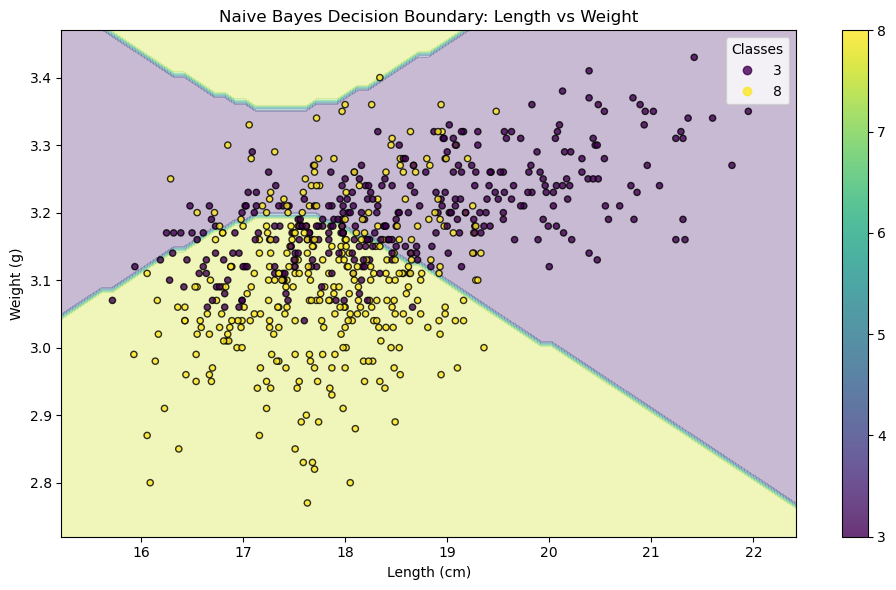


Naive Bayes Parameters:
Class priors: [0.49321267 0.50678733]
Mean length: [18.58626911 17.80815476]
Mean weight: [3.20055046 3.09779762]
Variance length: [1.68307232 0.581171  ]
Variance weight: [0.00520031 0.01230944]


In [40]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Assuming df_3_8 contains the data shown in the scatter plot
# Split the data as specified in the original query
train_data, temp_data = train_test_split(df_3_8, test_size=0.3, 
                                         stratify=df_3_8.iloc[:, -1], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, 
                                       stratify=temp_data.iloc[:, -1], random_state=42)

# Prepare data: use only original features (length and weight)
X_train = train_data[['length', 'weight']]
y_train = train_data['col0_encoded']
X_val = val_data[['length', 'weight']]
y_val = val_data['col0_encoded']
X_test = test_data[['length', 'weight']]
y_test = test_data['col0_encoded']

# Create and train the Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = nb_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"Validation Accuracy: {val_accuracy:.4f}")
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Evaluate on test set
y_test_pred = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

# Visualize the decision boundary
def plot_decision_boundary(model, X, y):
    # Determine bounds of the plot
    x_min, x_max = X['length'].min() - 0.5, X['length'].max() + 0.5
    y_min, y_max = X['weight'].min() - 0.05, X['weight'].max() + 0.05
    
    # Create a meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.01))
    
    # Predict for each point in the meshgrid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot decision boundary
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3)
    
    # Plot the data points
    scatter = plt.scatter(X['length'], X['weight'], c=y, 
                         edgecolor='k', s=20, alpha=0.8)
    
    plt.title('Naive Bayes Decision Boundary: Length vs Weight')
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.colorbar(scatter)
    
    # Add legend
    plt.legend(*scatter.legend_elements(), title="Classes")
    plt.tight_layout()
    plt.show()

# Show the decision boundary
plot_decision_boundary(nb_classifier, X_train, y_train)

# Print the learned parameters
print("\nNaive Bayes Parameters:")
print(f"Class priors: {nb_classifier.class_prior_}")
print(f"Mean length: {nb_classifier.theta_[:,0]}")
print(f"Mean weight: {nb_classifier.theta_[:,1]}")
print(f"Variance length: {nb_classifier.var_[:,0]}")
print(f"Variance weight: {nb_classifier.var_[:,1]}")


In [43]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

# Split the data as specified
train_data, temp_data = train_test_split(df_3_8, test_size=0.3, 
                                         stratify=df_3_8['col0_encoded'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, 
                                      stratify=temp_data['col0_encoded'], random_state=42)

# Prepare data
X_train = train_data[['length', 'weight']]
y_train = train_data['col0_encoded']
X_val = val_data[['length', 'weight']]
y_val = val_data['col0_encoded']
X_test = test_data[['length', 'weight']]
y_test = test_data['col0_encoded']

# Train Gaussian Naive Bayes
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Evaluate on validation set
y_val_pred = nb_classifier.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)
val_report = classification_report(y_val, y_val_pred)

# Evaluate on test set
y_test_pred = nb_classifier.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
test_report = classification_report(y_test, y_test_pred)

print(f"Test Accuracy: {test_accuracy}")
print("Test Report\n")
print(test_report)

print(f"Validation Accuracy: {val_accuracy}")
print("Validation Report\n")
print(val_report)


Test Accuracy: 0.7062937062937062
Test Report

              precision    recall  f1-score   support

           3       0.70      0.72      0.71        71
           8       0.71      0.69      0.70        72

    accuracy                           0.71       143
   macro avg       0.71      0.71      0.71       143
weighted avg       0.71      0.71      0.71       143

Validation Accuracy: 0.6408450704225352
Validation Report

              precision    recall  f1-score   support

           3       0.64      0.61      0.63        70
           8       0.64      0.67      0.65        72

    accuracy                           0.64       142
   macro avg       0.64      0.64      0.64       142
weighted avg       0.64      0.64      0.64       142




Training model with 2 hidden layers...
Validation Accuracy: 0.7676
Test Accuracy: 0.7692

Training model with 4 hidden layers...
Validation Accuracy: 0.7606
Test Accuracy: 0.7832

Training model with 8 hidden layers...
Validation Accuracy: 0.7465
Test Accuracy: 0.7762

Training model with 16 hidden layers...
Validation Accuracy: 0.7958
Test Accuracy: 0.7622

Training model with 32 hidden layers...
Validation Accuracy: 0.5070
Test Accuracy: 0.5035

Training model with 64 hidden layers...
Validation Accuracy: 0.5070
Test Accuracy: 0.5035

Model Performance Summary:
   layers  val_accuracy  test_accuracy  final_val_loss  final_train_loss
0       2      0.767606       0.769231        0.459230          0.442293
1       4      0.760563       0.783217        0.463118          0.446557
2       8      0.746479       0.776224        0.479337          0.436121
3      16      0.795775       0.762238        0.451477          0.456711
4      32      0.507042       0.503497        0.692670          

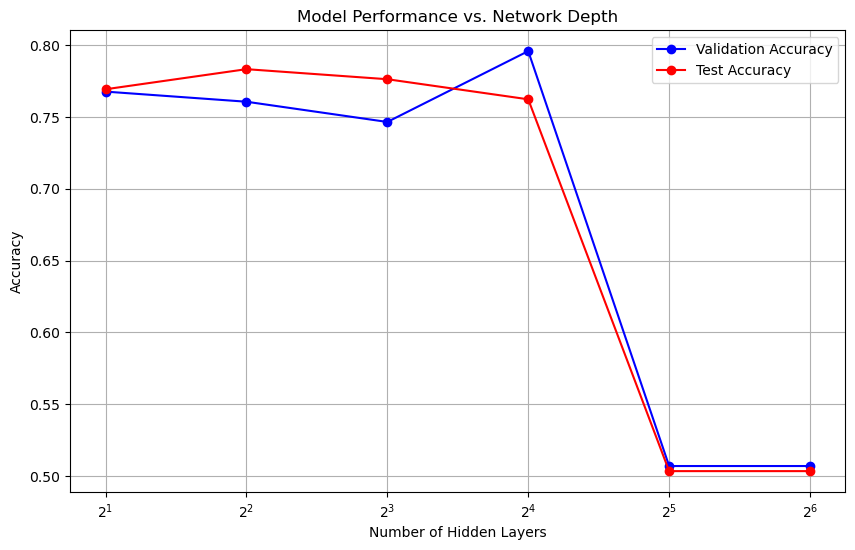


Best model has 16 hidden layers


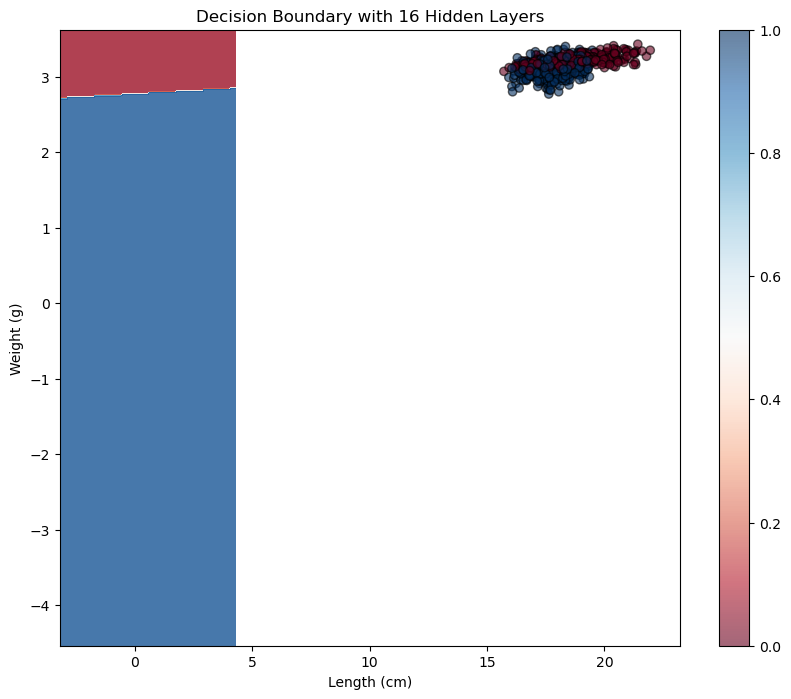

In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Assuming df_3_8 is your original dataframe with the length, weight, and class labels
# Split data as specified in your code
train_data, temp_data = train_test_split(df_3_8, test_size=0.3, stratify=df_3_8['col0_encoded'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['col0_encoded'], random_state=42)

# Extract features and targets
X_train = train_data[['length', 'weight']].values
y_train = train_data['col0_encoded'].values
X_val = val_data[['length', 'weight']].values
y_val = val_data['col0_encoded'].values
X_test = test_data[['length', 'weight']].values
y_test = test_data['col0_encoded'].values

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Convert data to binary classification (3 -> 0, 8 -> 1)
y_train_binary = (y_train == 8).astype(np.float32)
y_val_binary = (y_val == 8).astype(np.float32)
y_test_binary = (y_test == 8).astype(np.float32)

# Convert to PyTorch tensors
X_train_tensor = torch.FloatTensor(X_train_scaled)
y_train_tensor = torch.FloatTensor(y_train_binary)
X_val_tensor = torch.FloatTensor(X_val_scaled)
y_val_tensor = torch.FloatTensor(y_val_binary)
X_test_tensor = torch.FloatTensor(X_test_scaled)
y_test_tensor = torch.FloatTensor(y_test_binary)

# Create data loaders - Fix for tensor reshaping
train_dataset = TensorDataset(X_train_tensor, y_train_tensor.reshape(-1, 1))
val_dataset = TensorDataset(X_val_tensor, y_val_tensor.reshape(-1, 1))
test_dataset = TensorDataset(X_test_tensor, y_test_tensor.reshape(-1, 1))

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)
test_loader = DataLoader(test_dataset, batch_size=32)

# Define a neural network class with variable number of layers
class NeuralNet(nn.Module):
    def __init__(self, num_layers):
        super(NeuralNet, self).__init__()
        self.layers = nn.ModuleList()
        self.layers.append(nn.Linear(2, 64))  # Input layer
        
        # Add hidden layers
        for _ in range(num_layers):
            self.layers.append(nn.Linear(64, 64))
            
        self.output = nn.Linear(64, 1)  # Output layer
        
    def forward(self, x):
        for layer in self.layers:
            x = torch.relu(layer(x))
        x = torch.sigmoid(self.output(x))
        return x

# Training function
def train_model(model, train_loader, val_loader, epochs=20):
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    
    train_losses = []
    val_losses = []
    val_accuracies = []
    
    for epoch in range(epochs):
        model.train()
        train_loss = 0.0
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
        
        # Validation
        model.eval()
        val_loss = 0.0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, targets in val_loader:
                outputs = model(inputs)
                loss = criterion(outputs, targets)
                val_loss += loss.item()
                
                predicted = (outputs >= 0.5).float()
                total += targets.size(0)
                correct += (predicted == targets).sum().item()
        
        val_accuracy = correct / total
        val_accuracies.append(val_accuracy)
        
        train_losses.append(train_loss / len(train_loader))
        val_losses.append(val_loss / len(val_loader))
    
    return train_losses, val_losses, val_accuracies

# Evaluate model
def evaluate_model(model, data_loader):
    model.eval()
    correct = 0
    total = 0
    all_preds = []
    all_targets = []
    
    with torch.no_grad():
        for inputs, targets in data_loader:
            outputs = model(inputs)
            predicted = (outputs >= 0.5).float()
            total += targets.size(0)
            correct += (predicted == targets).sum().item()
            
            all_preds.extend(predicted.cpu().numpy())
            all_targets.extend(targets.cpu().numpy())
    
    accuracy = correct / total
    return accuracy, all_preds, all_targets

# Train models with increasing layer counts
layer_counts = [2, 4, 8, 16, 32, 64]
results = []

for num_layers in layer_counts:
    print(f"\nTraining model with {num_layers} hidden layers...")
    model = NeuralNet(num_layers)
    
    # Train the model
    train_losses, val_losses, val_accuracies = train_model(model, train_loader, val_loader)
    
    # Evaluate on validation and test sets
    val_accuracy, val_preds, val_targets = evaluate_model(model, val_loader)
    test_accuracy, test_preds, test_targets = evaluate_model(model, test_loader)
    
    results.append({
        'layers': num_layers,
        'val_accuracy': val_accuracy,
        'test_accuracy': test_accuracy,
        'final_val_loss': val_losses[-1],
        'final_train_loss': train_losses[-1]
    })
    
    print(f"Validation Accuracy: {val_accuracy:.4f}")
    print(f"Test Accuracy: {test_accuracy:.4f}")

# Convert results to DataFrame for better display
results_df = pd.DataFrame(results)
print("\nModel Performance Summary:")
print(results_df)

# Plot accuracy vs. number of layers - FIXED VERSION
plt.figure(figsize=(10, 6))
# Convert DataFrame columns to numpy arrays explicitly
plt.plot(results_df['layers'].values, results_df['val_accuracy'].values, 'bo-', label='Validation Accuracy')
plt.plot(results_df['layers'].values, results_df['test_accuracy'].values, 'ro-', label='Test Accuracy')
plt.xlabel('Number of Hidden Layers')
plt.ylabel('Accuracy')
plt.title('Model Performance vs. Network Depth')
plt.xscale('log', base=2)
plt.grid(True)
plt.legend()
plt.show()

# Visualize decision boundary for the best model - with error handling
best_idx = results_df['val_accuracy'].idxmax()
best_layer_count = results_df.loc[best_idx, 'layers']
print(f"\nBest model has {best_layer_count} hidden layers")

# Create a visualization of the decision boundary with error handling
def plot_decision_boundary(model, X, y):
    # Set up a meshgrid
    h = 0.02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    
    # Get predictions for each point in the meshgrid
    model.eval()
    with torch.no_grad():
        mesh_points = np.c_[xx.ravel(), yy.ravel()]
        mesh_points_scaled = scaler.transform(mesh_points)
        mesh_points_tensor = torch.FloatTensor(mesh_points_scaled)
        Z = model(mesh_points_tensor).detach().cpu().numpy()
        Z = (Z >= 0.5).astype(int)
        Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)
    
    # Plot the original data points
    X_orig = scaler.inverse_transform(X)
    plt.scatter(X_orig[:, 0], X_orig[:, 1], c=y, edgecolors='k', cmap=plt.cm.RdBu, alpha=0.6)
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.title(f'Decision Boundary with {best_layer_count} Hidden Layers')
    plt.colorbar()
    plt.show()

# Train the best model again and visualize its decision boundary
best_model = NeuralNet(int(best_layer_count))
train_model(best_model, train_loader, val_loader)
plot_decision_boundary(best_model, X_train_scaled, y_train_binary)

In [46]:
import pandas as pd

# Filter out classes 3 and 8 from the original dataframe
df_no_3_8 = df[~df['col0_encoded'].isin([3, 8])]

# Display the first few rows of the new dataframe
print(f"Original dataframe shape: {df.shape}")
print(f"New dataframe shape: {df_no_3_8.shape}")
print("\nFirst 5 rows of df_no_3_8:")
df_no_3_8.head()


Original dataframe shape: (4080, 5)
New dataframe shape: (3132, 5)

First 5 rows of df_no_3_8:


species  length  weight  col0_encoded           species_label
0  Anabas testudineus   10.66    3.45             1  Anabas testudineus (1)
1  Anabas testudineus    6.91    3.27             1  Anabas testudineus (1)
2  Anabas testudineus    8.38    3.46             1  Anabas testudineus (1)
3  Anabas testudineus    7.57    3.36             1  Anabas testudineus (1)
4  Anabas testudineus   10.83    3.38             1  Anabas testudineus (1)

In [47]:
df_no_3_8 = df_no_3_8.drop(columns=["species", "species_label"])
df_no_3_8.head()

length  weight  col0_encoded
0   10.66    3.45             1
1    6.91    3.27             1
2    8.38    3.46             1
3    7.57    3.36             1
4   10.83    3.38             1

In [51]:
# Split into train (60%), and a temporary set (40%)
train_data, temp_data = train_test_split(df_no_3_8, test_size=0.4, 
                                        random_state=42, 
                                        stratify=df_no_3_8['col0_encoded'])

# Split the temporary set into validation (20%) and test (20%)
val_data, test_data = train_test_split(temp_data, test_size=0.5, 
                                      random_state=42, 
                                      stratify=temp_data['col0_encoded'])

# Verify split sizes
print(f"Train set shape: {train_data.shape} ({train_data.shape[0]/df_no_3_8.shape[0]:.2f})")
print(f"Validation set shape: {val_data.shape} ({val_data.shape[0]/df_no_3_8.shape[0]:.2f})")
print(f"Test set shape: {test_data.shape} ({test_data.shape[0]/df_no_3_8.shape[0]:.2f})")

Train set shape: (1879, 3) (0.60)
Validation set shape: (626, 3) (0.20)
Test set shape: (627, 3) (0.20)


In [52]:
# Prepare features and target variables
X_train = train_data[['length', 'weight']]
y_train = train_data['col0_encoded']
X_val = val_data[['length', 'weight']]
y_val = val_data['col0_encoded']
X_test = test_data[['length', 'weight']]
y_test = test_data['col0_encoded']

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Try different SVM kernels
kernels = ['linear', 'rbf', 'poly', 'sigmoid']
best_kernel = None
best_val_accuracy = 0

results = []

for kernel in kernels:
    # Train SVM with current kernel
    svm_classifier = SVC(kernel=kernel, random_state=42)
    svm_classifier.fit(X_train_scaled, y_train)
    
    # Evaluate on validation set
    y_val_pred = svm_classifier.predict(X_val_scaled)
    val_accuracy = accuracy_score(y_val, y_val_pred)
    
    # Evaluate on test set
    y_test_pred = svm_classifier.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    # Store results
    results.append({
        'kernel': kernel,
        'validation_accuracy': val_accuracy,
        'test_accuracy': test_accuracy
    })
    
    # Track best performing kernel
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        best_kernel = kernel
    
    print(f"SVM with {kernel} kernel:")
    print(f"  Validation Accuracy: {val_accuracy:.4f}")
    print(f"  Test Accuracy: {test_accuracy:.4f}")

# Train best kernel and show detailed results
best_svm = SVC(kernel=best_kernel, random_state=42)
best_svm.fit(X_train_scaled, y_train)

# Final validation evaluation
y_val_pred = best_svm.predict(X_val_scaled)
print(f"\nBest Kernel: {best_kernel}")
print(f"Final Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print("Validation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Final test evaluation
y_test_pred = best_svm.predict(X_test_scaled)
print(f"Final Test Accuracy: {accuracy_score(y_test, y_test_pred):.4f}")
print("Test Classification Report:")
print(classification_report(y_test, y_test_pred))

SVM with linear kernel:
  Validation Accuracy: 1.0000
  Test Accuracy: 0.9984
SVM with rbf kernel:
  Validation Accuracy: 1.0000
  Test Accuracy: 0.9984
SVM with poly kernel:
  Validation Accuracy: 0.9888
  Test Accuracy: 0.9825
SVM with sigmoid kernel:
  Validation Accuracy: 0.9633
  Test Accuracy: 0.9585

Best Kernel: linear
Final Validation Accuracy: 1.0000
Validation Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        95
           2       1.00      1.00      1.00        83
           4       1.00      1.00      1.00        87
           5       1.00      1.00      1.00        95
           6       1.00      1.00      1.00        91
           7       1.00      1.00      1.00        84
           9       1.00      1.00      1.00        91

    accuracy                           1.00       626
   macro avg       1.00      1.00      1.00       626
weighted avg       1.00      1.00      1.00       626

Final 

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


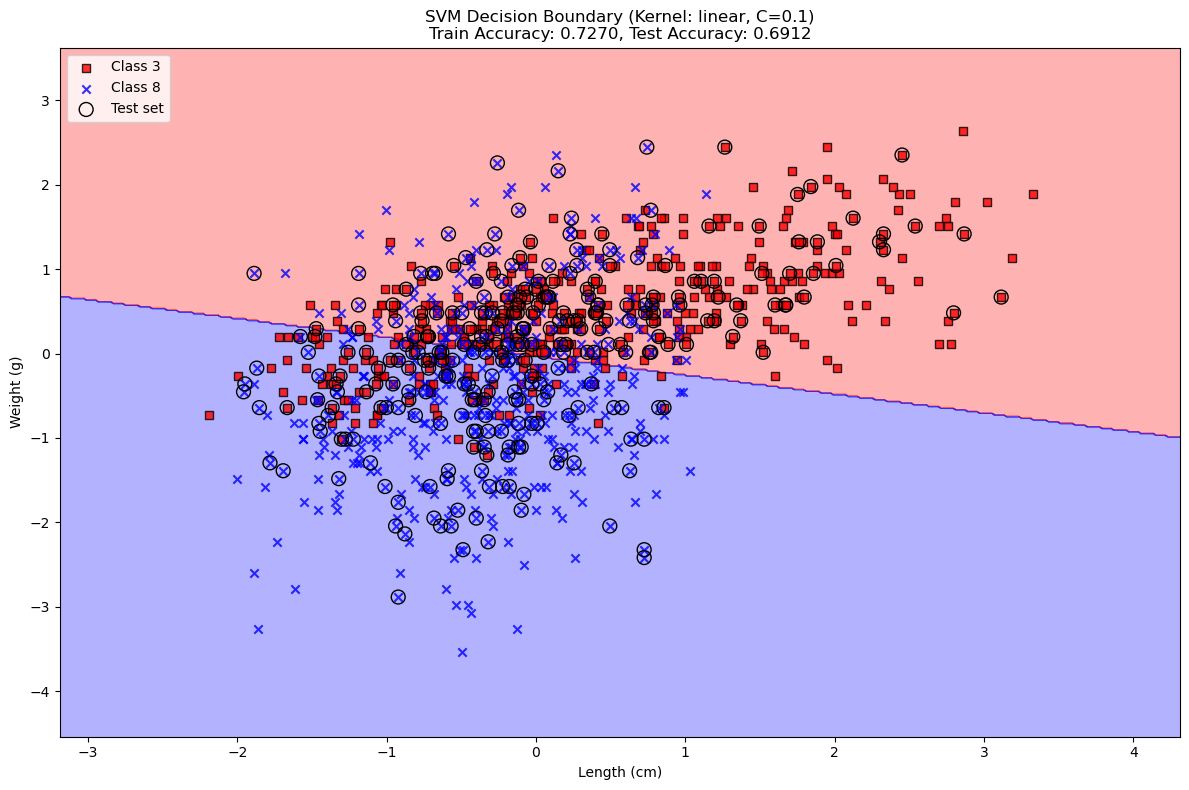

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


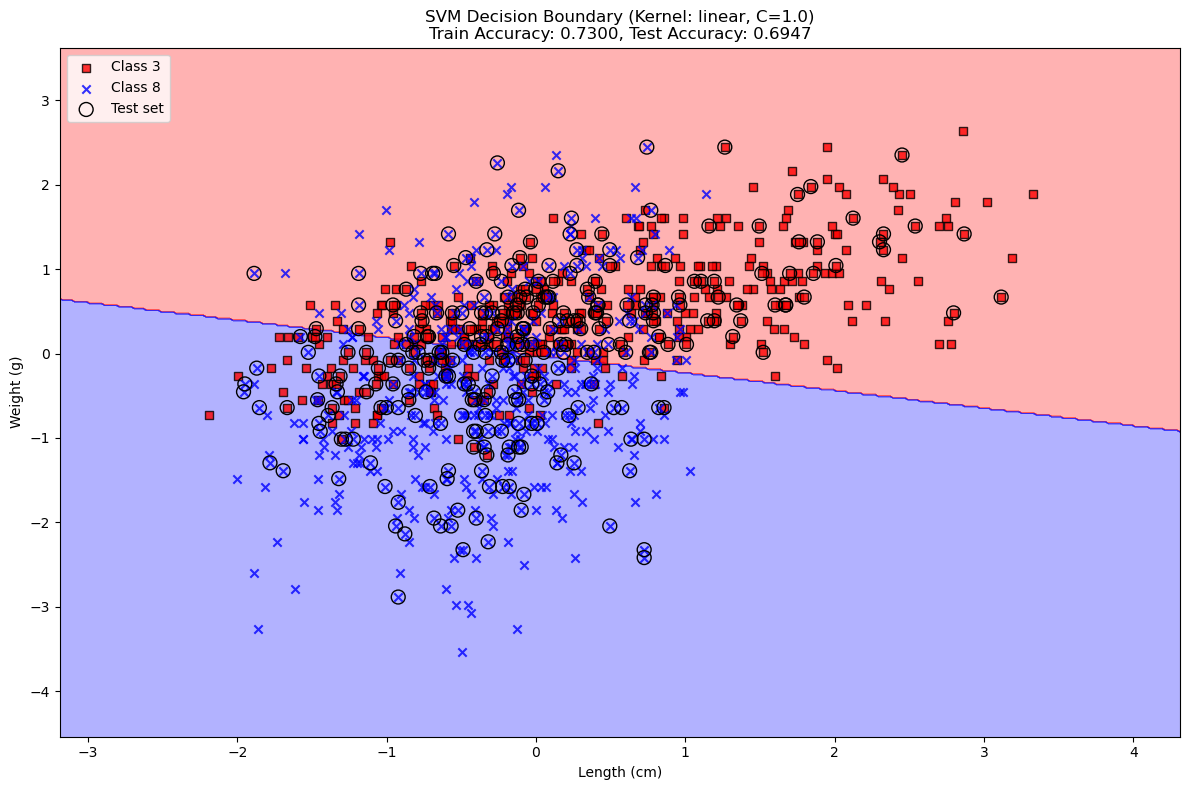

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


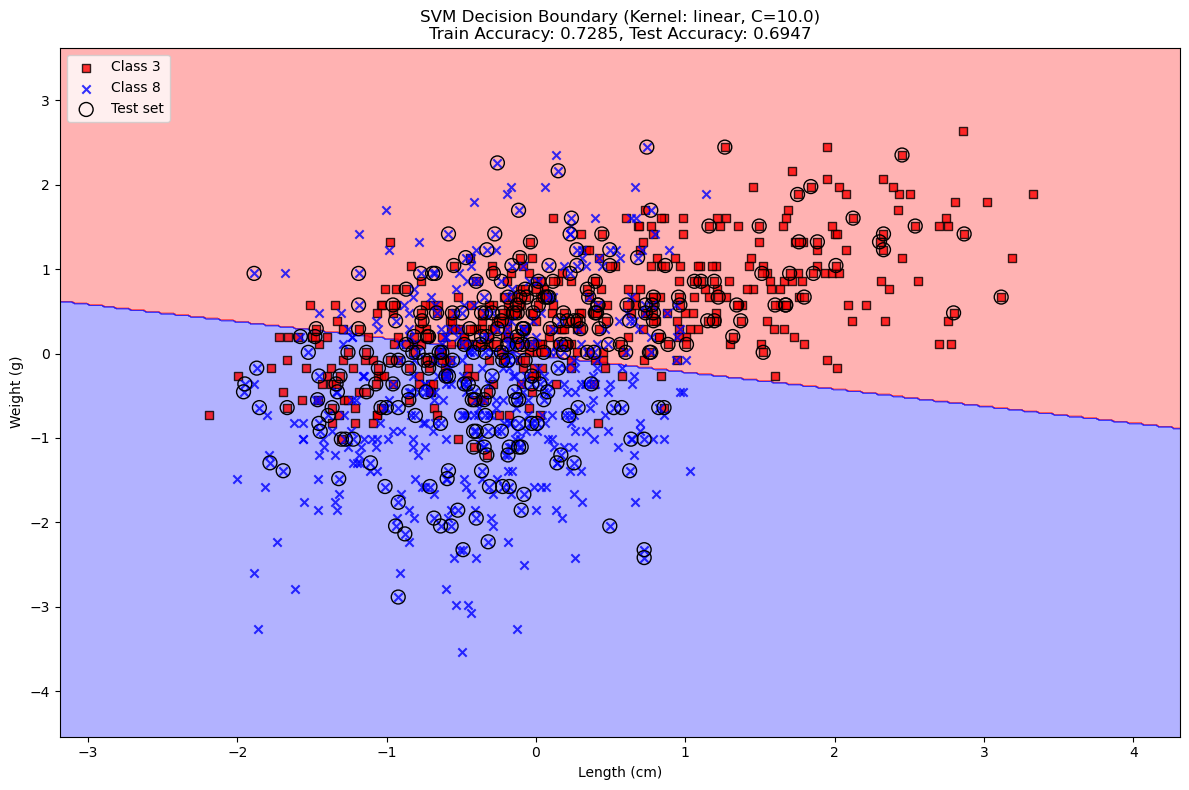

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


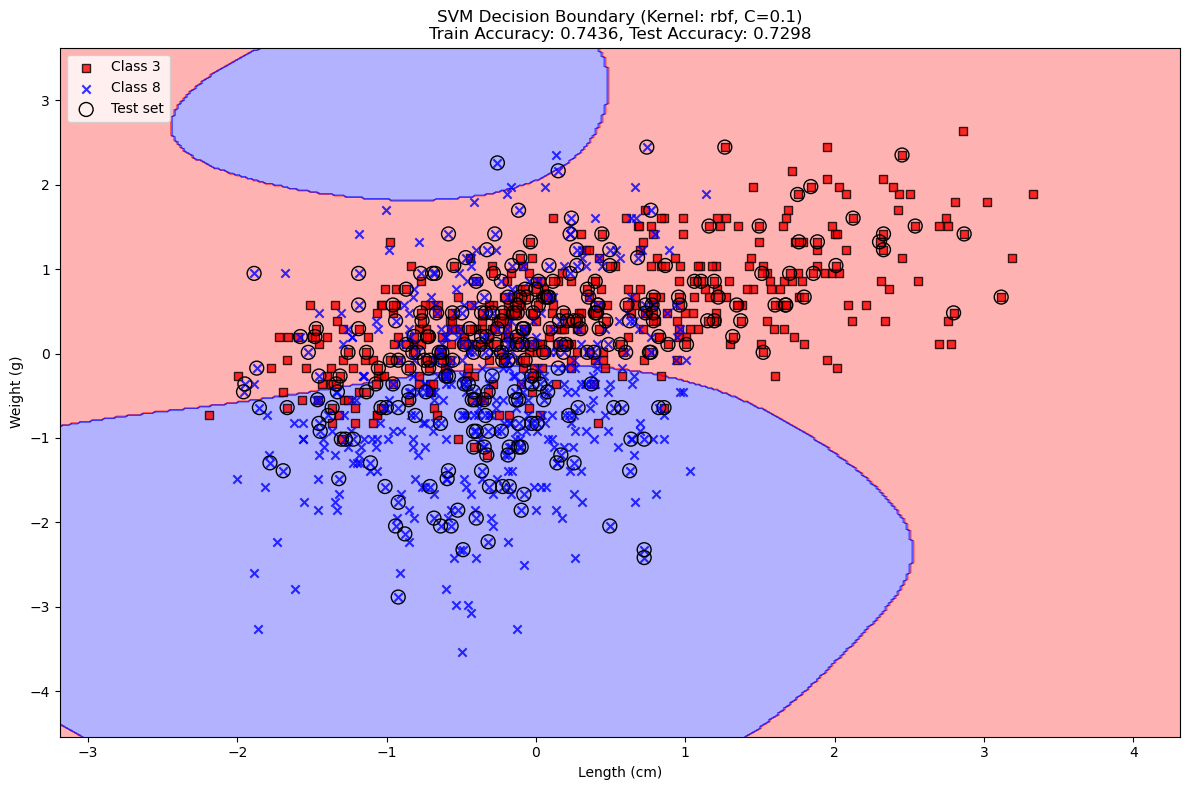

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


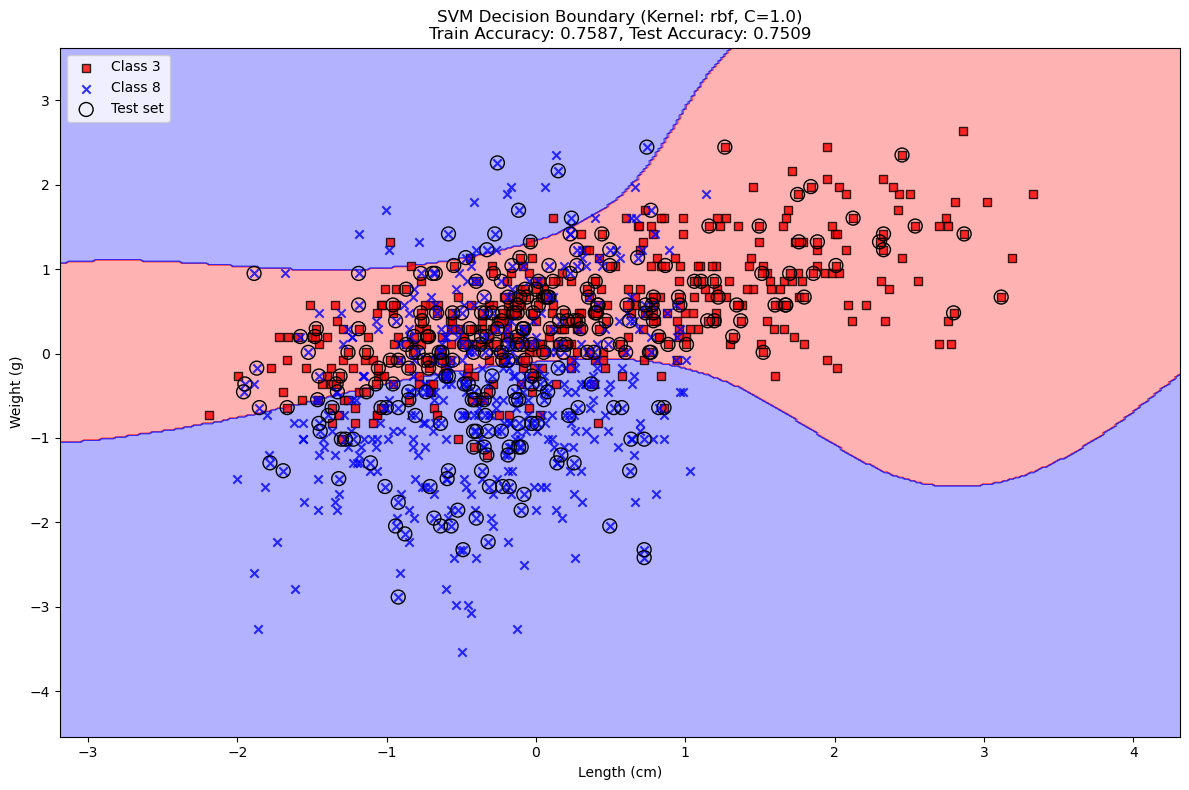

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


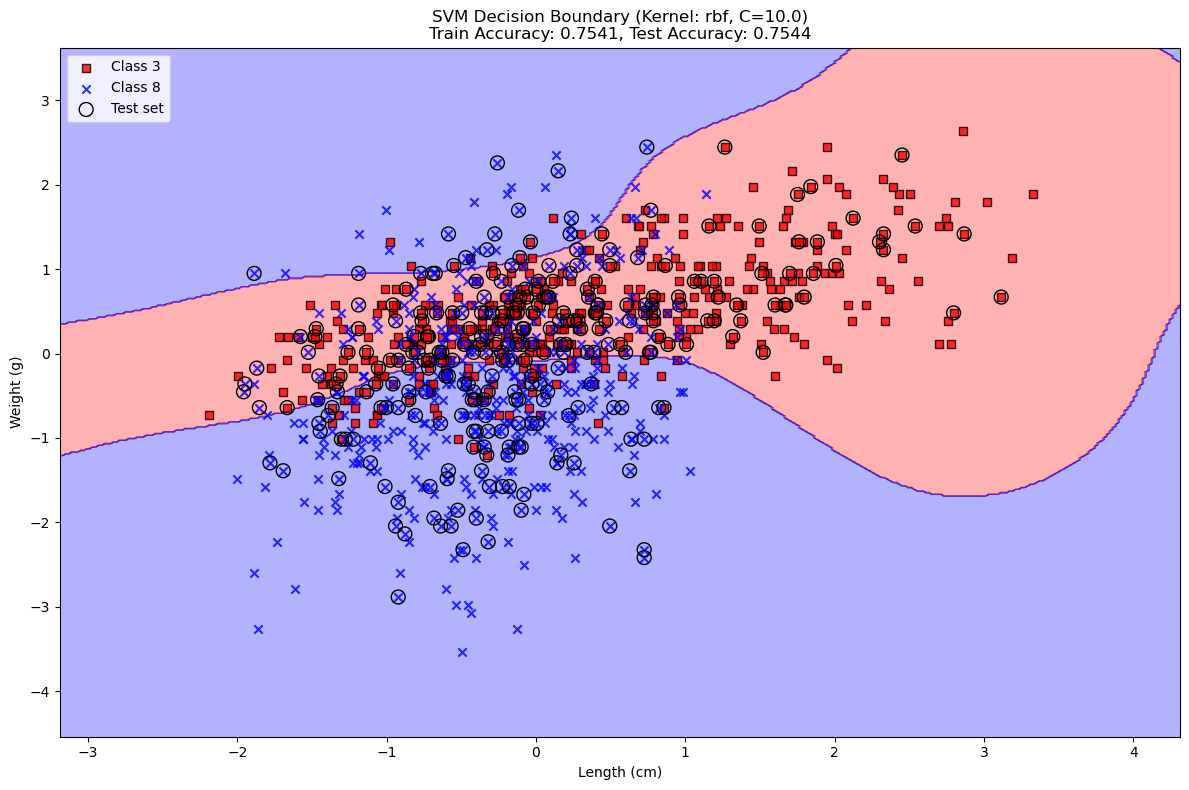

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


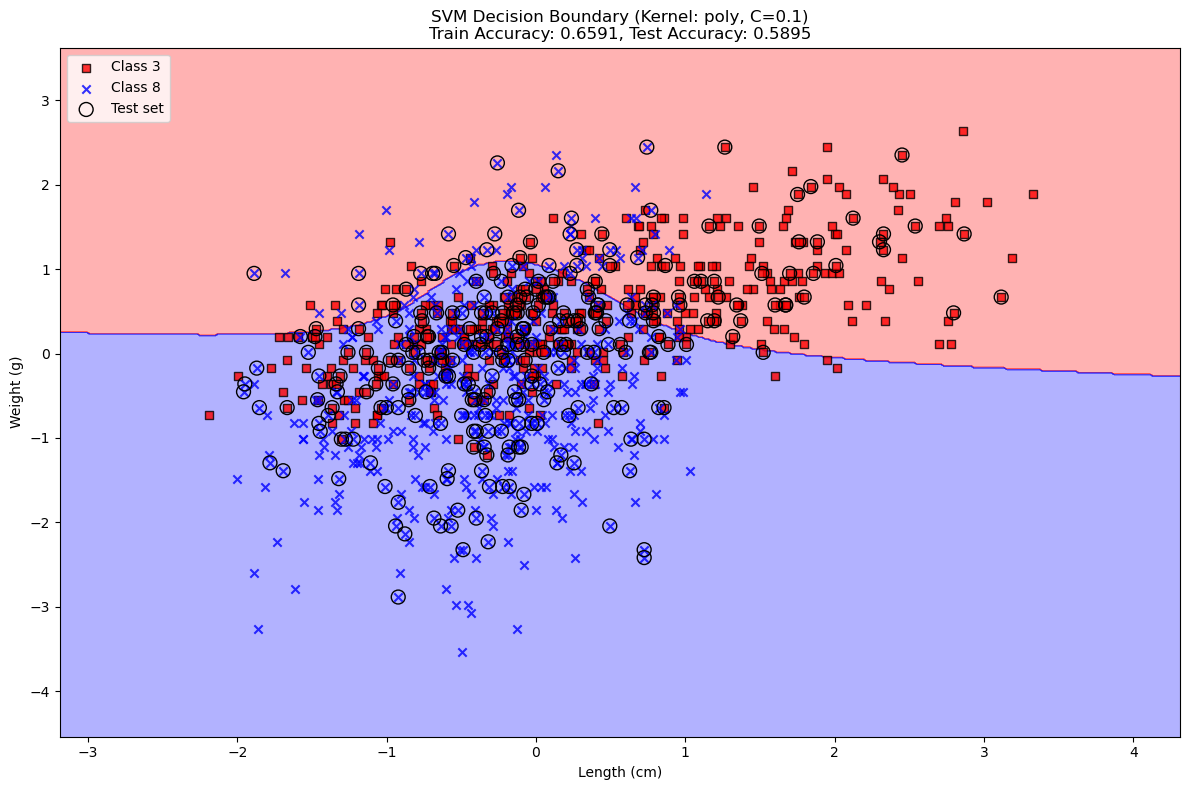

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


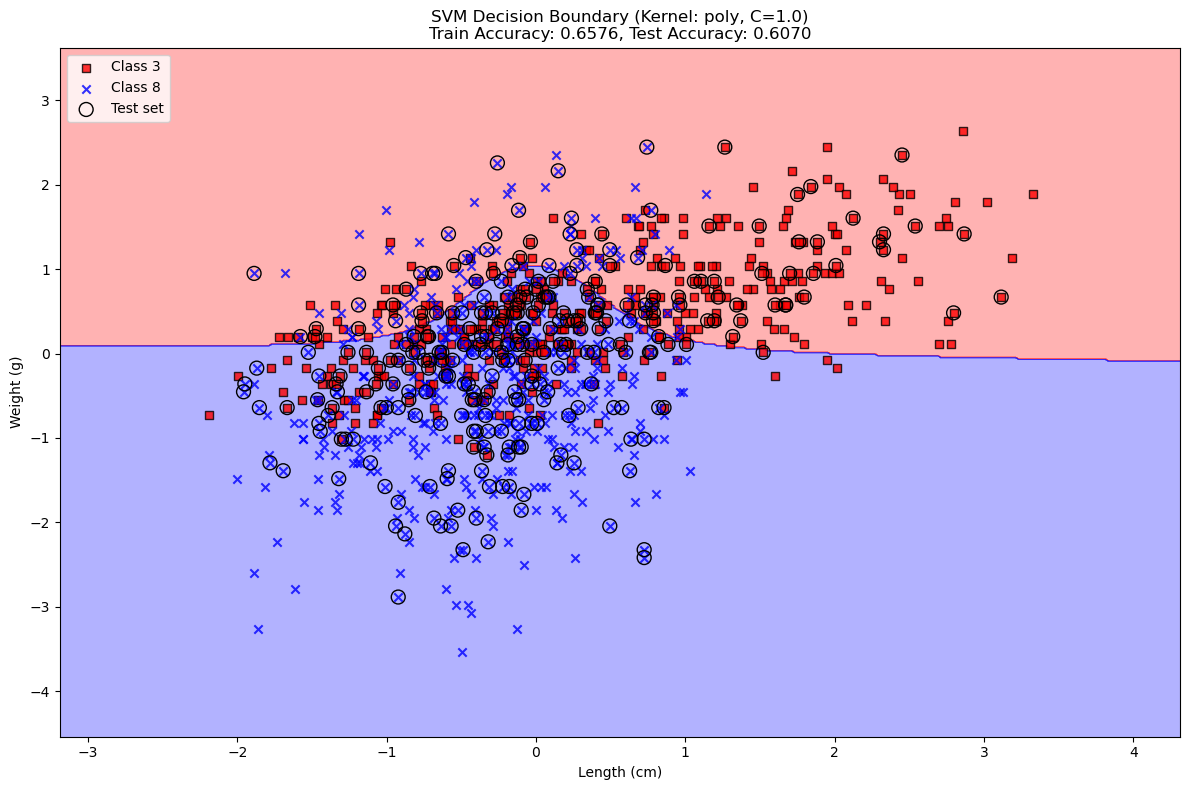

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


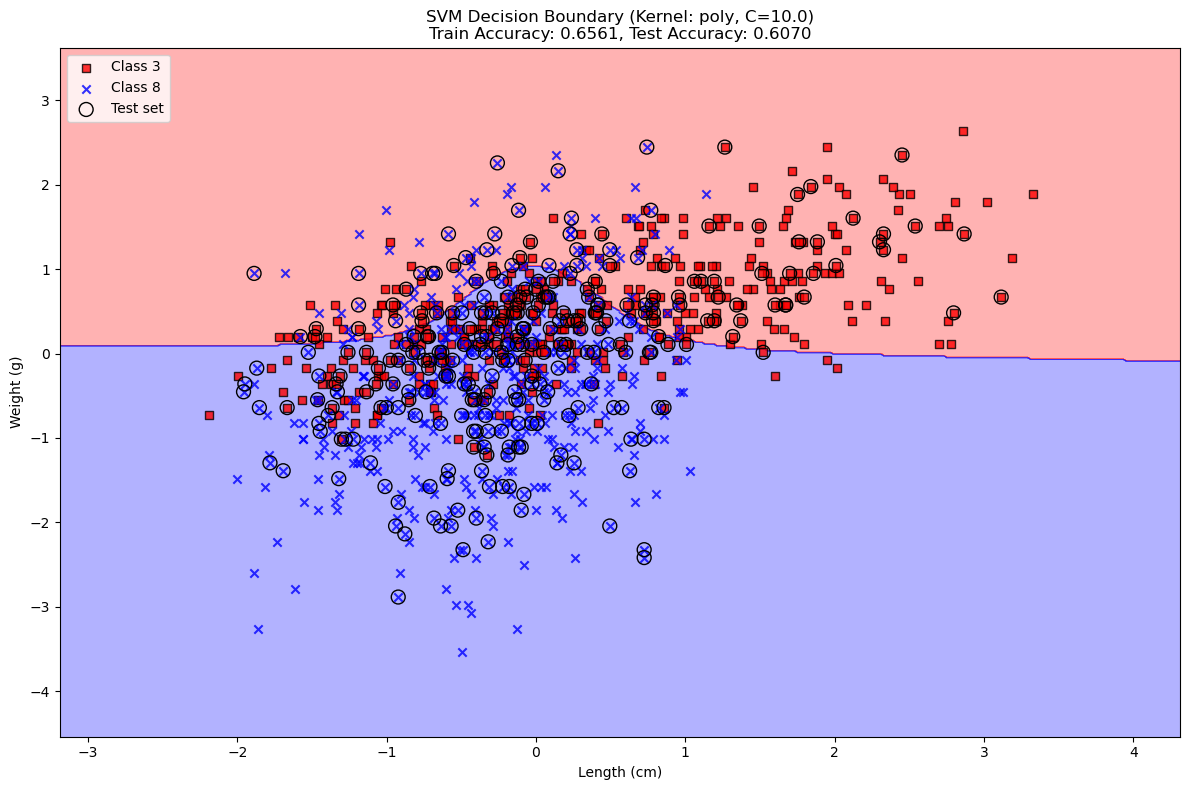

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


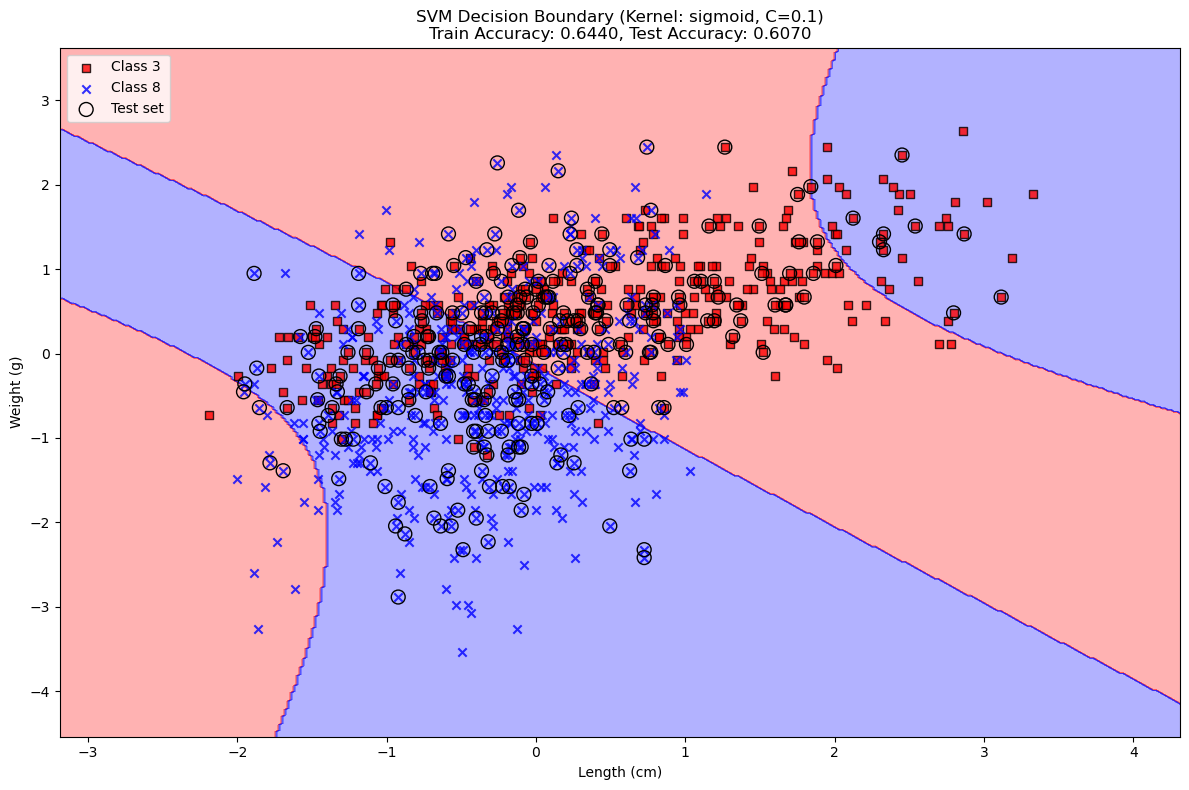

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


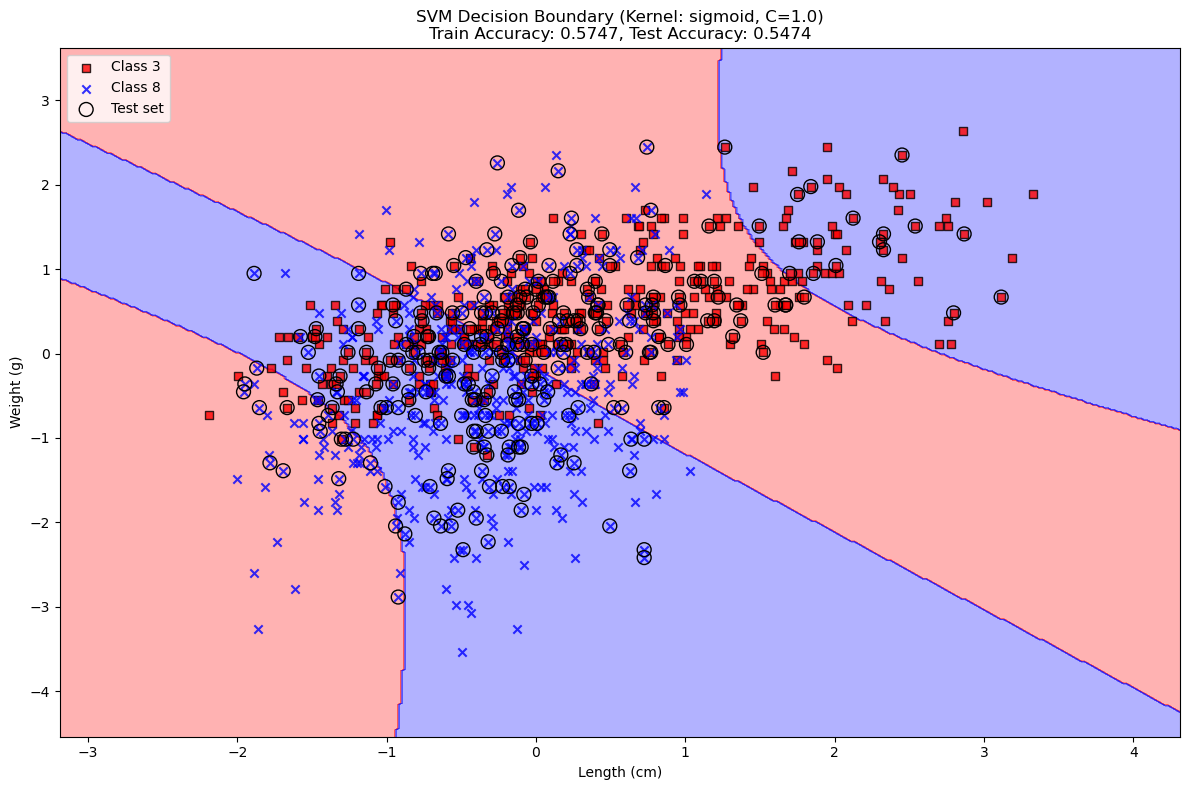

/tmp/ipykernel_5983/695630174.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


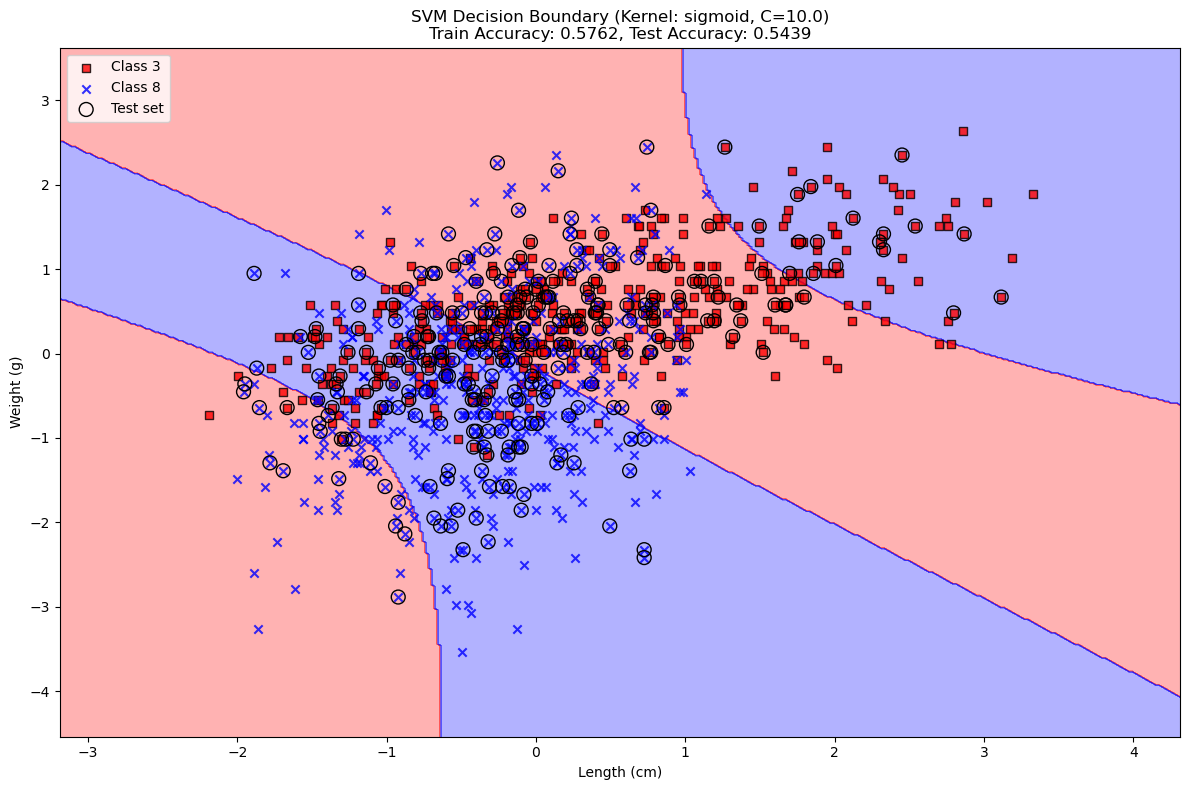

     kernel     C  train_accuracy  test_accuracy
5       rbf  10.0        0.754148       0.754386
4       rbf   1.0        0.758673       0.750877
3       rbf   0.1        0.743590       0.729825
1    linear   1.0        0.730015       0.694737
2    linear  10.0        0.728507       0.694737
0    linear   0.1        0.726998       0.691228
7      poly   1.0        0.657617       0.607018
8      poly  10.0        0.656109       0.607018
9   sigmoid   0.1        0.644042       0.607018
6      poly   0.1        0.659125       0.589474
10  sigmoid   1.0        0.574661       0.547368
11  sigmoid  10.0        0.576169       0.543860


In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, test_idx=None, resolution=0.02, title="SVM Decision Boundary"):
    """
    Function to plot the decision boundary for an SVM classifier
    
    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The feature data (must have exactly 2 features for visualization)
    y : array-like of shape (n_samples,)
        The target labels
    classifier : estimator object
        The trained classifier (SVM)
    test_idx : array-like, optional
        Indices of test samples to highlight
    resolution : float, default=0.02
        Grid step size for mesh creation
    title : str, default="SVM Decision Boundary"
        Title for the plot
    """
    # Create color maps for background and points
    markers = ('s', 'x', 'o', '^', 'v', 'D', '<', '>', 'p', '*')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'orange', 'green', 'yellow', 'purple', 'brown')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Get predictions for meshgrid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Plot decision regions
    plt.figure(figsize=(12, 8))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot all samples
    class_labels = np.unique(y)
    for idx, cl in enumerate(class_labels):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
    
    # Highlight test samples if provided
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', 
                    edgecolor='black', 
                    alpha=1.0, 
                    linewidth=1, 
                    marker='o', 
                    s=100, 
                    label='Test set')
    
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Example 1: SVM Decision Boundary for Class 3 vs Class 8
def plot_binary_svm_decision_boundary(df_3_8, kernel='rbf', C=1.0):
    """
    Plot SVM decision boundary for binary classification (Class 3 vs Class 8)
    """
    # Prepare data
    X = df_3_8[['length', 'weight']].values
    y = df_3_8['col0_encoded'].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)
    
    # Train SVM
    svm = SVC(kernel=kernel, C=C, gamma='auto', random_state=42)
    svm.fit(X_train_std, y_train)
    
    # Calculate accuracy
    train_accuracy = svm.score(X_train_std, y_train)
    test_accuracy = svm.score(X_test_std, y_test)
    
    # Plot decision boundary
    X_combined = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    test_idx = range(len(X_train_std), len(X_combined))
    
    plot_decision_boundary(
        X=X_combined, 
        y=y_combined,
        classifier=svm,
        test_idx=test_idx,
        title=f'SVM Decision Boundary (Kernel: {kernel}, C={C})\n'
              f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}'
    )
    
    return svm, train_accuracy, test_accuracy

# Example 2: SVM Decision Boundary for Multi-class (df_no_3_8)
def plot_multiclass_svm_decision_boundary(df_no_3_8, kernel='rbf', C=1.0):
    """
    Plot SVM decision boundary for multi-class classification
    """
    # Prepare data
    X = df_no_3_8[['length', 'weight']].values
    y = df_no_3_8['col0_encoded'].values
    
    # Split data (60/20/20)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.4, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    # Standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_val_std = sc.transform(X_val)
    X_test_std = sc.transform(X_test)
    
    # Train SVM with One-vs-Rest strategy for multi-class
    svm = SVC(kernel=kernel, C=C, gamma='auto', decision_function_shape='ovr', random_state=42)
    svm.fit(X_train_std, y_train)
    
    # Calculate accuracy
    val_accuracy = svm.score(X_val_std, y_val)
    test_accuracy = svm.score(X_test_std, y_test)
    
    # Plot decision boundary for training and validation sets
    X_combined = np.vstack((X_train_std, X_val_std))
    y_combined = np.hstack((y_train, y_val))
    test_idx = range(len(X_train_std), len(X_combined))
    
    plot_decision_boundary(
        X=X_combined, 
        y=y_combined,
        classifier=svm,
        test_idx=test_idx,
        title=f'SVM Multi-class Decision Boundary (Kernel: {kernel}, C={C})\n'
              f'Validation Accuracy: {val_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}'
    )
    
    return svm, val_accuracy, test_accuracy

# Example usage for Class 3 vs Class 8
# svm_model, train_acc, test_acc = plot_binary_svm_decision_boundary(df_3_8, kernel='rbf', C=1.0)

# Example usage for multi-class without Class 3 and 8
# svm_model, val_acc, test_acc = plot_multiclass_svm_decision_boundary(df_no_3_8, kernel='rbf', C=1.0)

# Try different kernels to find the best boundary
def compare_svm_kernels(data, binary=True):
    """
    Compare different SVM kernels and their decision boundaries
    
    Parameters:
    -----------
    data : DataFrame
        Dataset to use
    binary : bool, default=True
        If True, use binary classification function, else use multi-class
    """
    kernels = ['linear', 'rbf', 'poly', 'sigmoid']
    C_values = [0.1, 1.0, 10.0]
    
    results = []
    
    for kernel in kernels:
        for C in C_values:
            if binary:
                svm, train_acc, test_acc = plot_binary_svm_decision_boundary(data, kernel=kernel, C=C)
                results.append({
                    'kernel': kernel,
                    'C': C,
                    'train_accuracy': train_acc,
                    'test_accuracy': test_acc
                })
            else:
                svm, val_acc, test_acc = plot_multiclass_svm_decision_boundary(data, kernel=kernel, C=C)
                results.append({
                    'kernel': kernel,
                    'C': C,
                    'validation_accuracy': val_acc,
                    'test_accuracy': test_acc
                })
    
    # Display results as a table
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
results_table = compare_svm_kernels(df_3_8, binary=True)
print(results_table.sort_values(by='test_accuracy', ascending=False))

# For multi-class:
# results_table_multi = compare_svm_kernels(df_no_3_8, binary=False) 
# print(results_table_multi.sort_values(by='test_accuracy', ascending=False))


/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


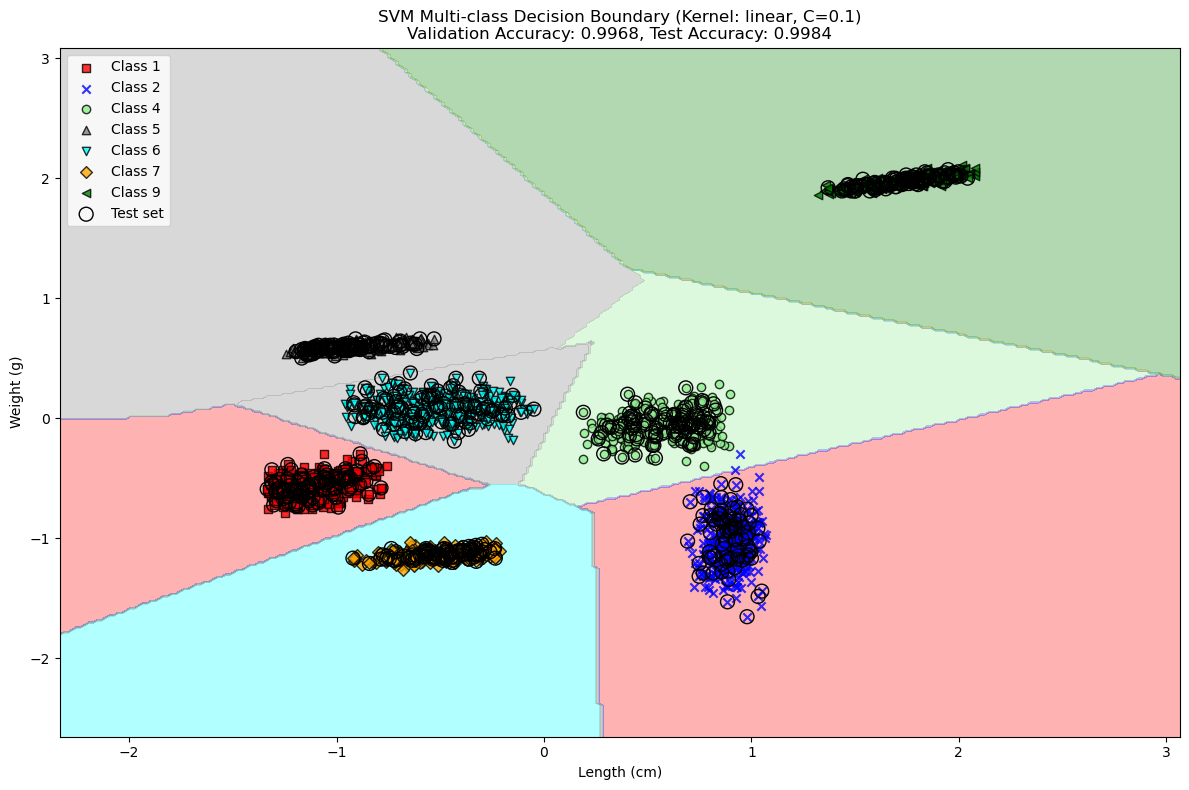

/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


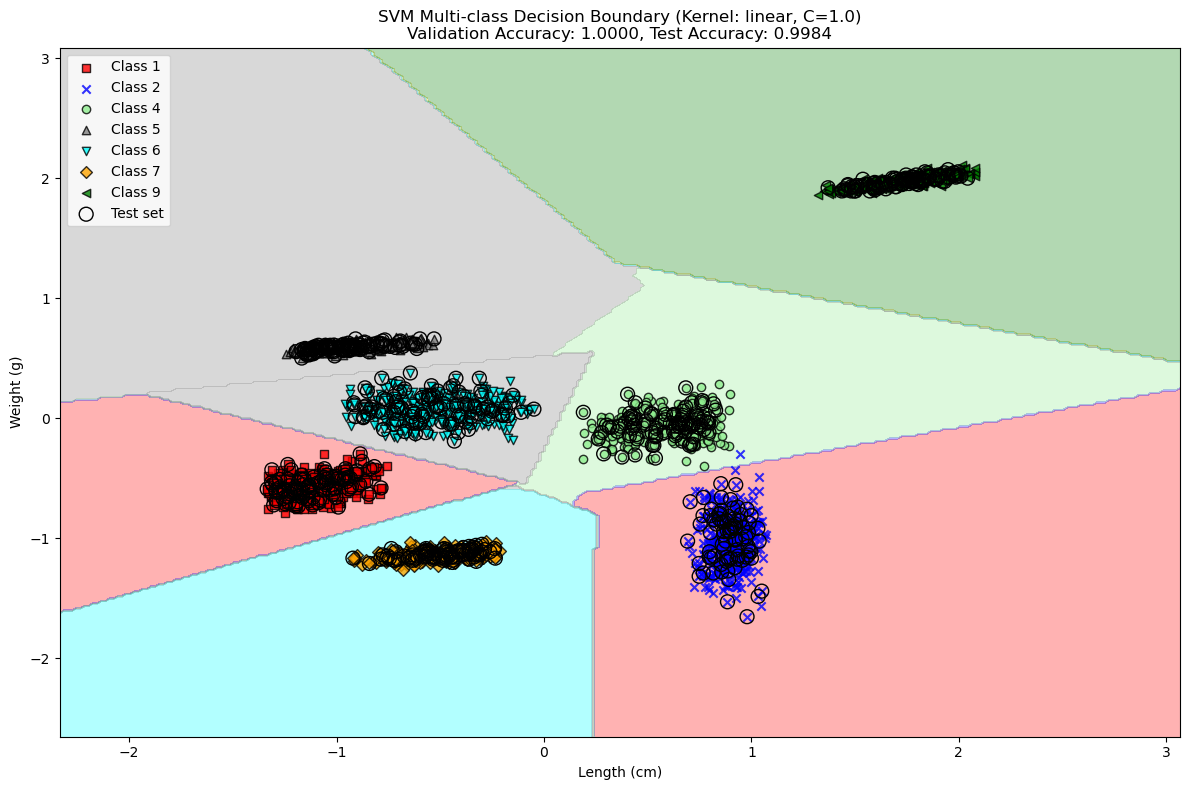

/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


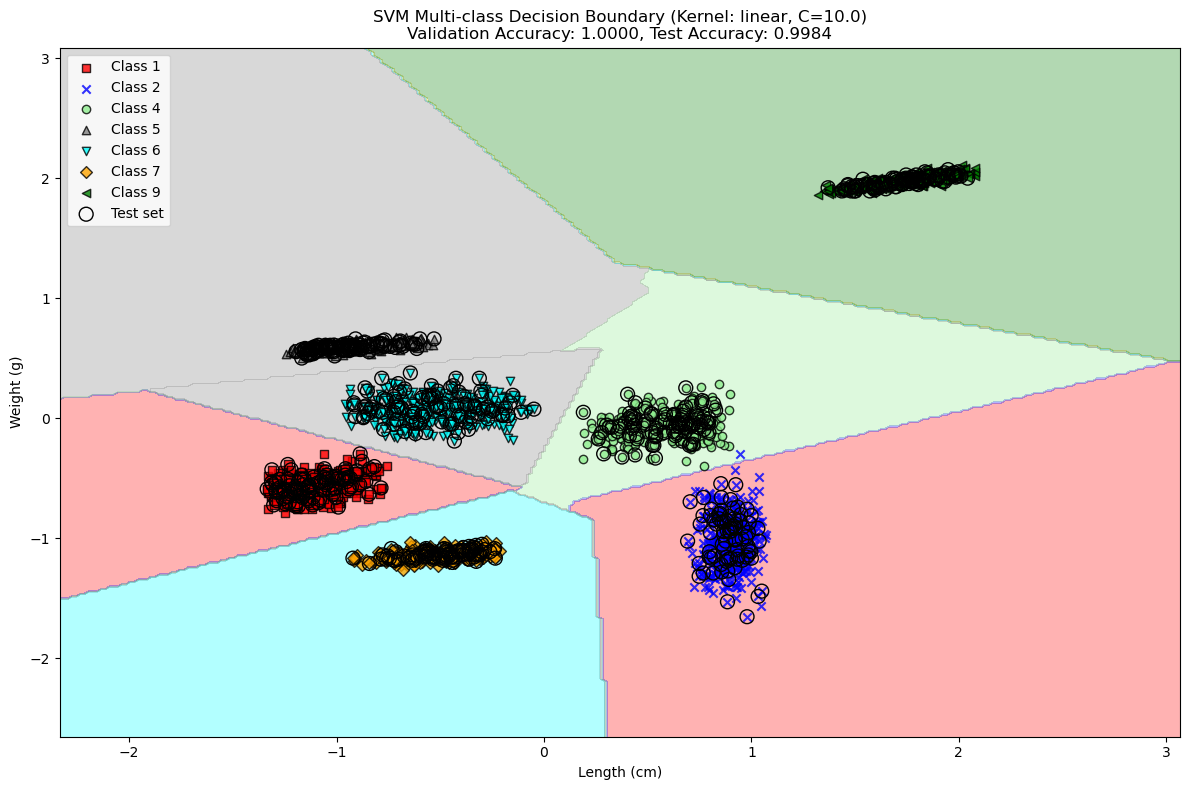

/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


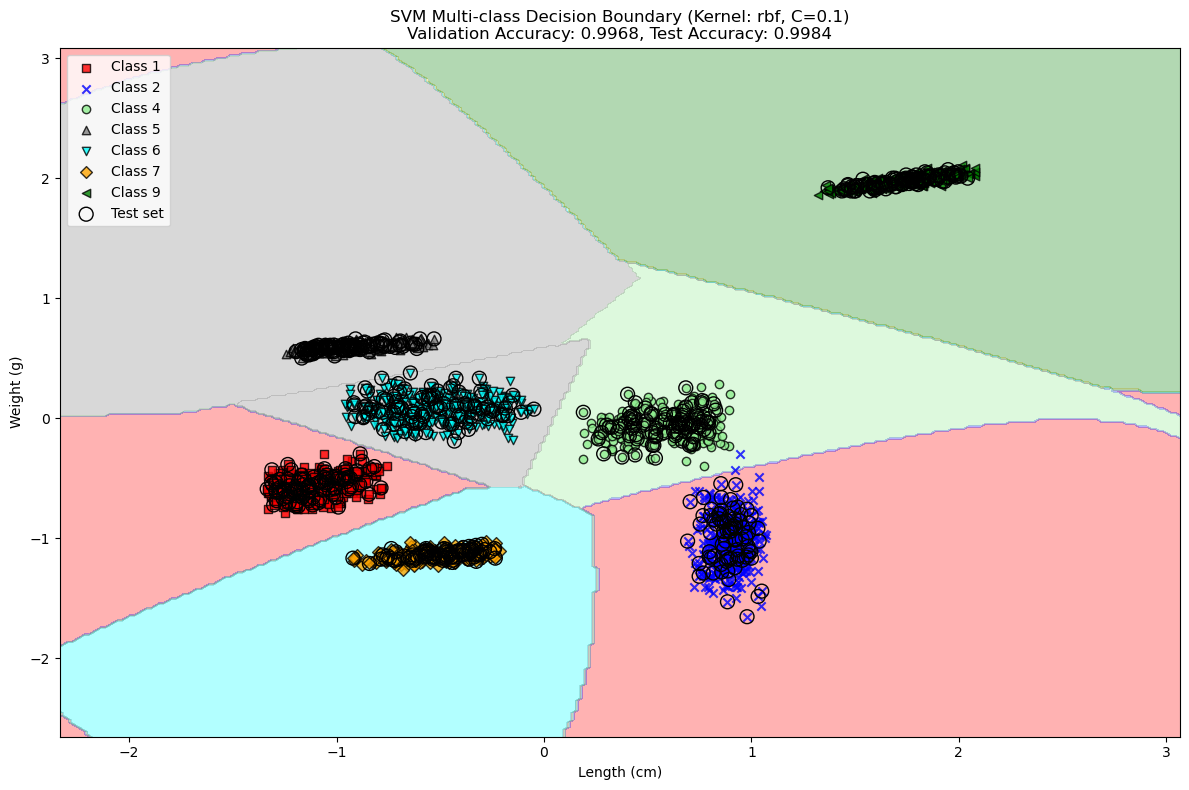

/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


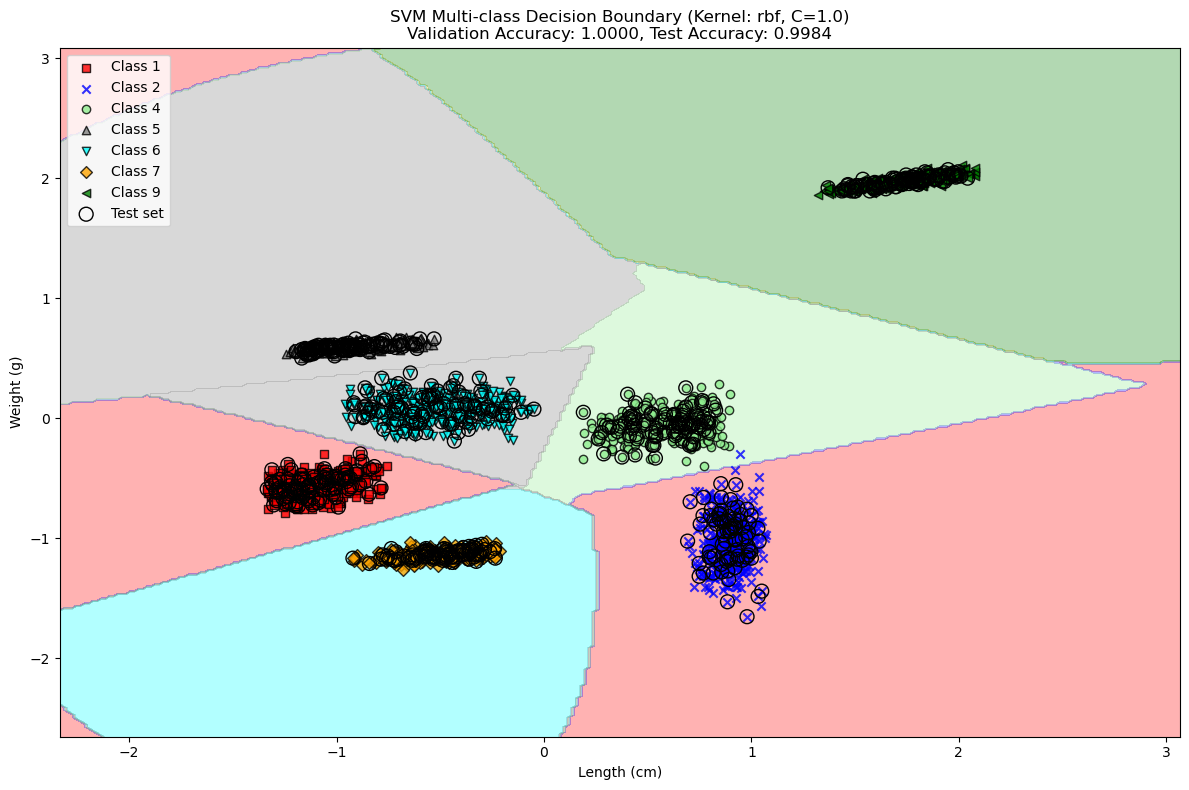

/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


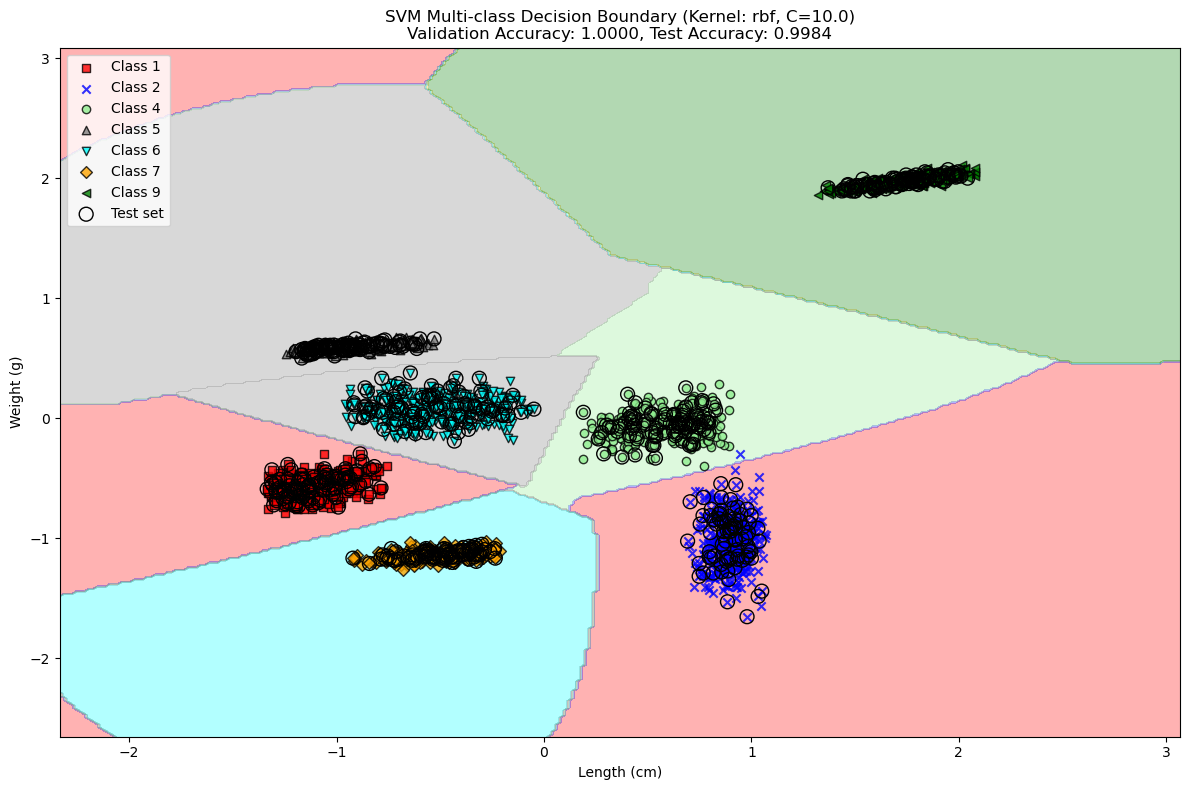

/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


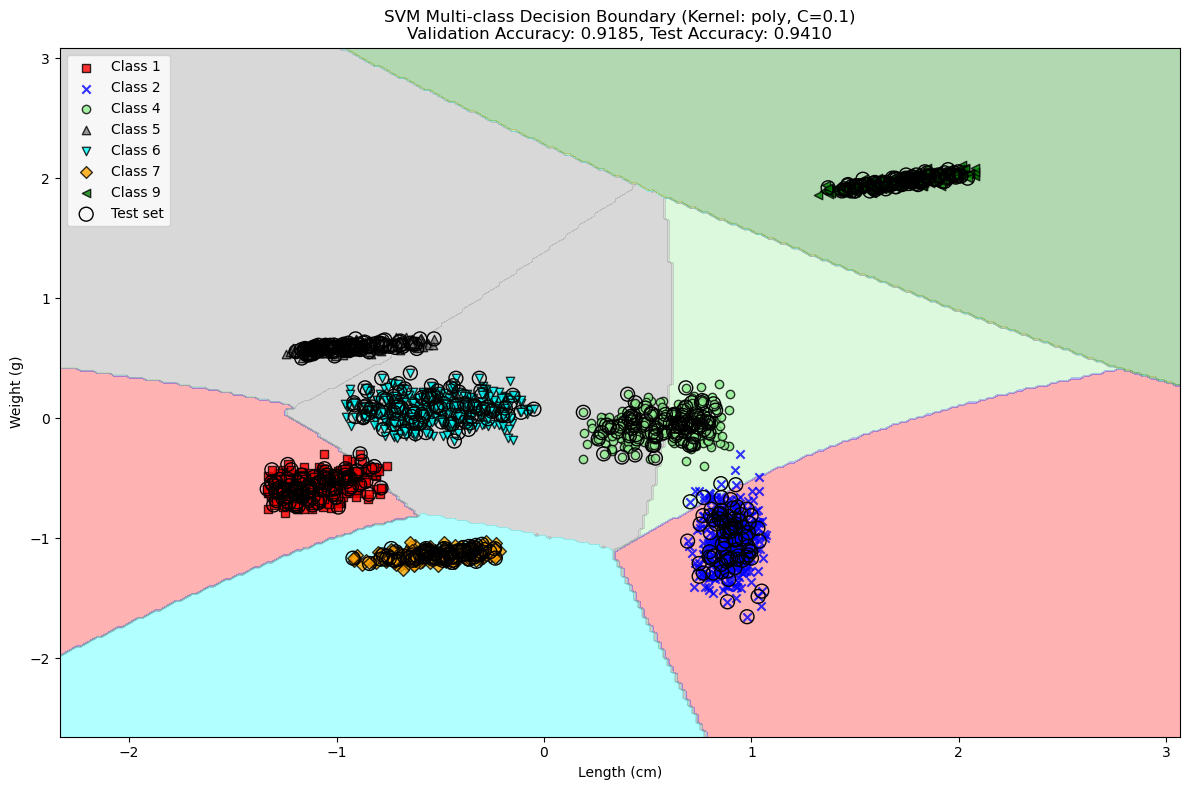

/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


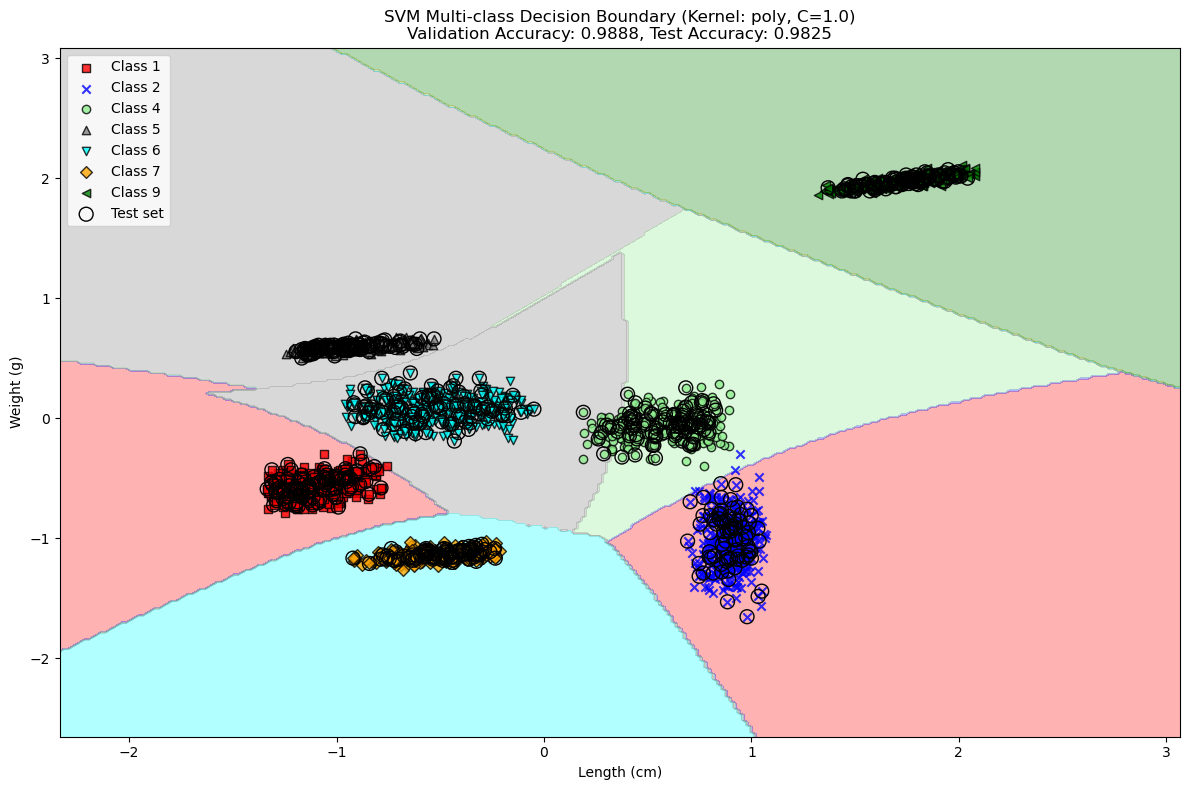

/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


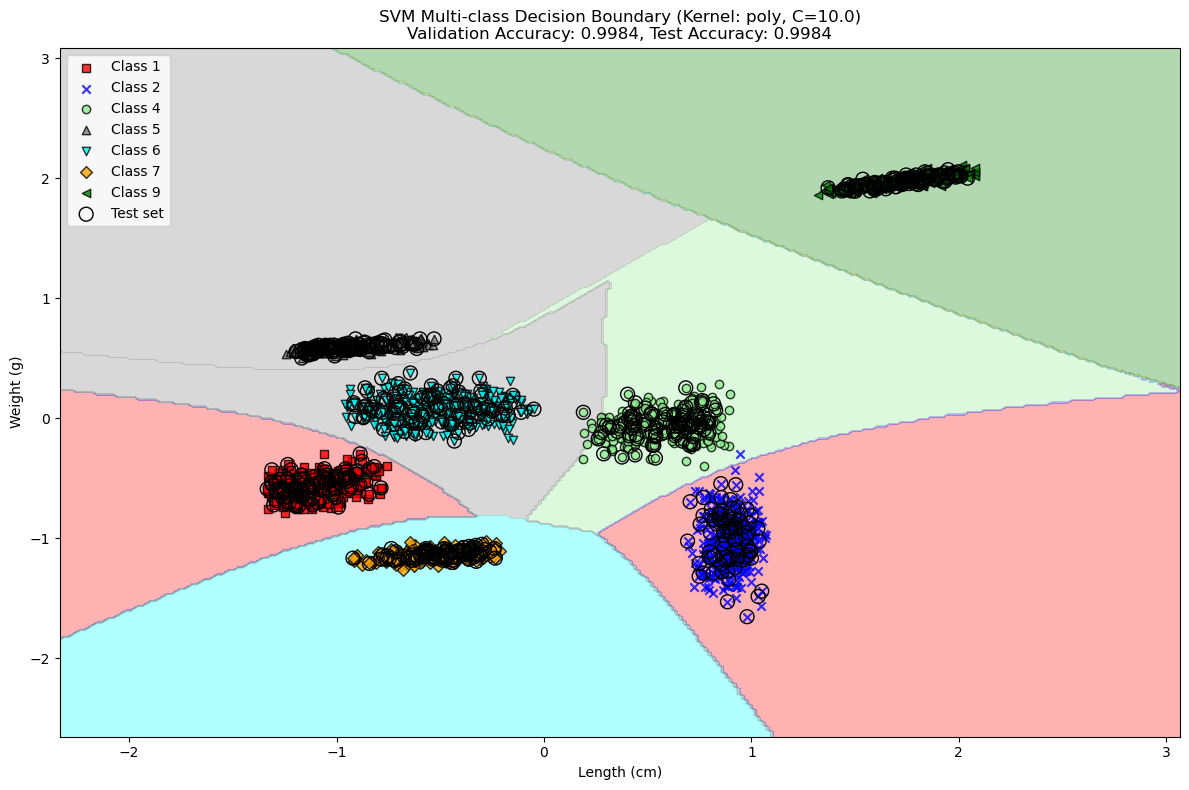

/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


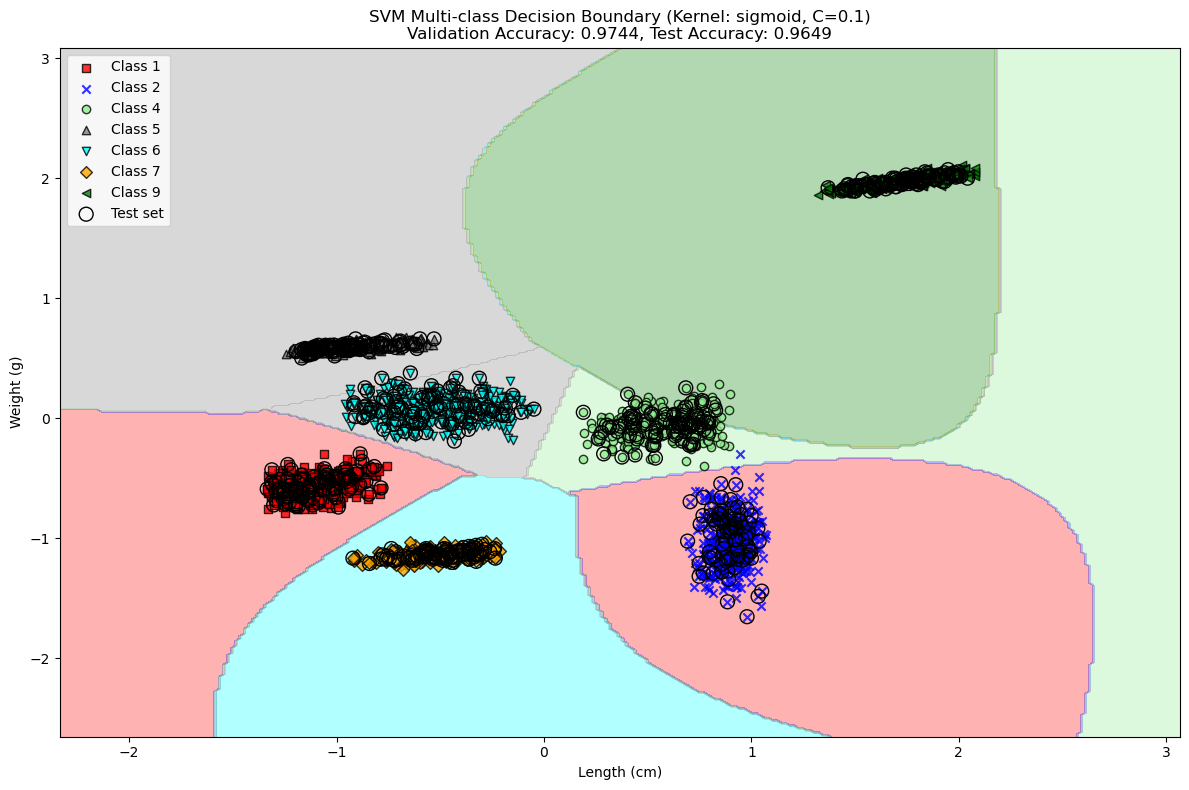

/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


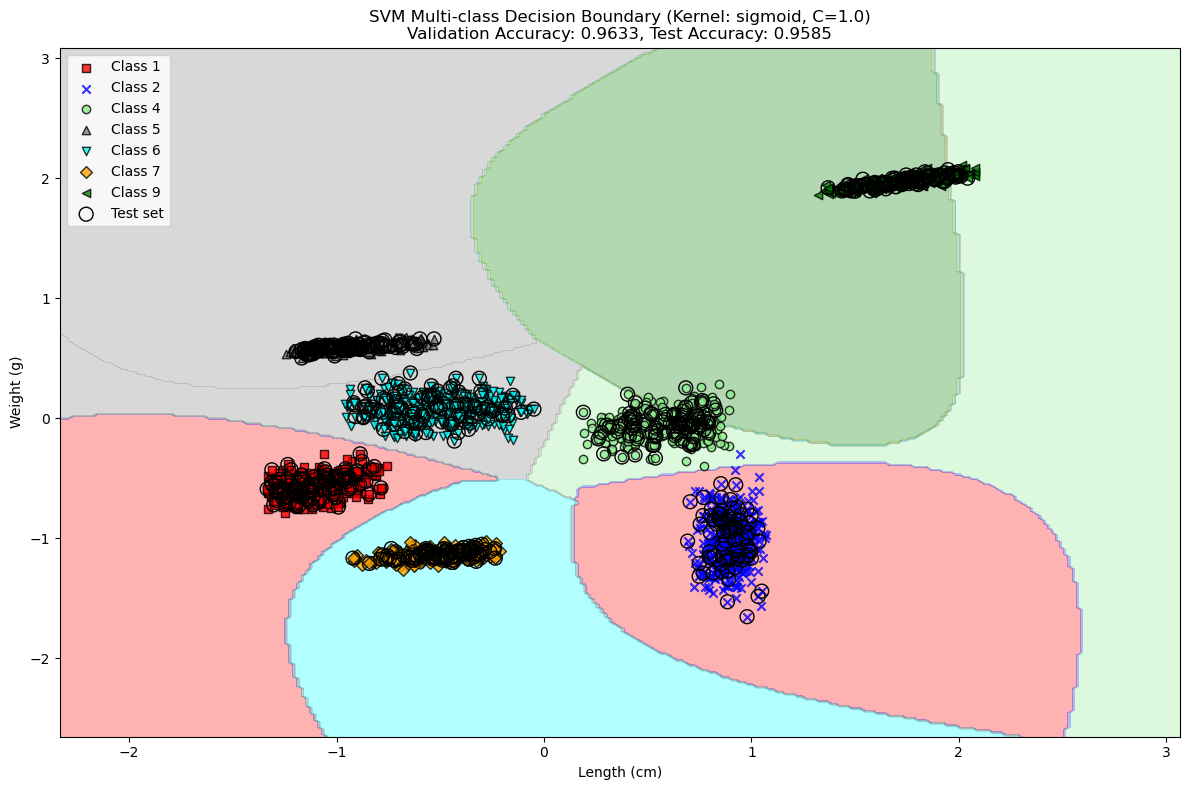

/tmp/ipykernel_5983/4143596154.py:52: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


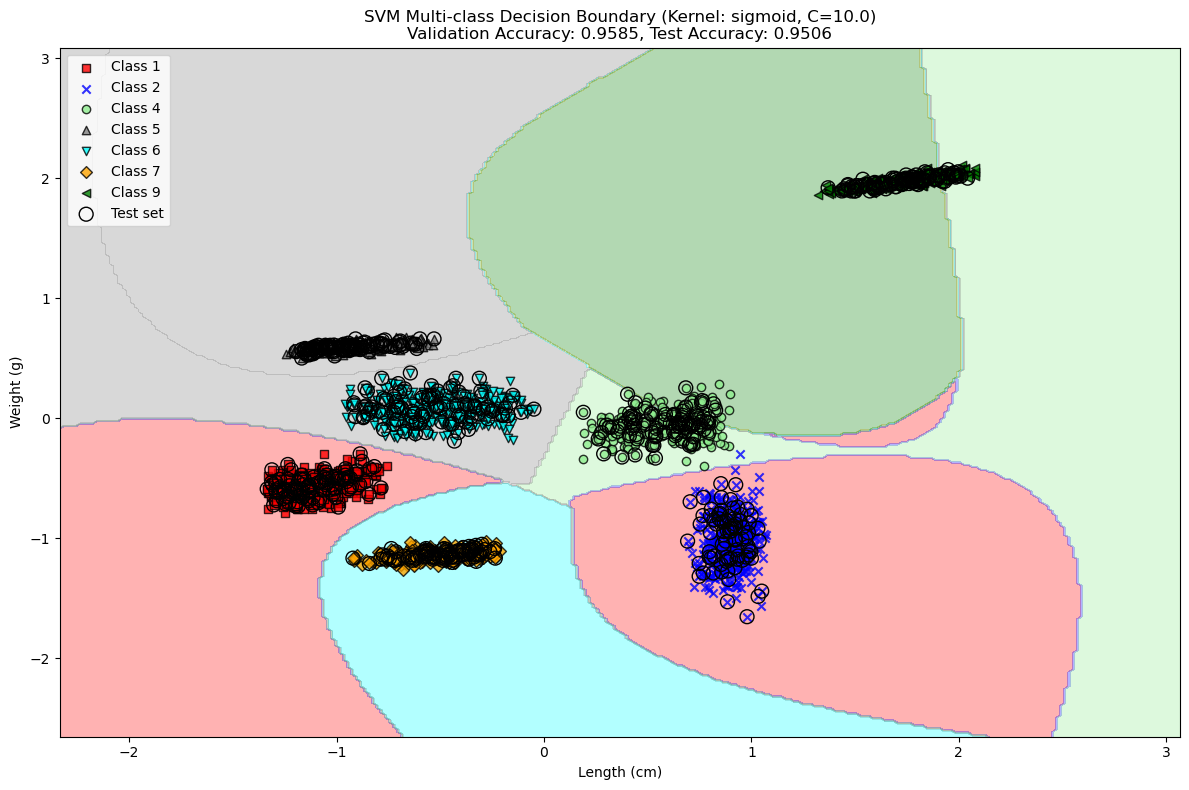

     kernel     C  validation_accuracy  test_accuracy
0    linear   0.1             0.996805       0.998405
1    linear   1.0             1.000000       0.998405
2    linear  10.0             1.000000       0.998405
3       rbf   0.1             0.996805       0.998405
4       rbf   1.0             1.000000       0.998405
5       rbf  10.0             1.000000       0.998405
8      poly  10.0             0.998403       0.998405
7      poly   1.0             0.988818       0.982456
9   sigmoid   0.1             0.974441       0.964912
10  sigmoid   1.0             0.963259       0.958533
11  sigmoid  10.0             0.958466       0.950558
6      poly   0.1             0.918530       0.940989


In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap

def plot_decision_boundary(X, y, classifier, test_idx=None, resolution=0.02, title="SVM Decision Boundary"):
    """
    Function to plot the decision boundary for an SVM classifier
    
    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The feature data (must have exactly 2 features for visualization)
    y : array-like of shape (n_samples,)
        The target labels
    classifier : estimator object
        The trained classifier (SVM)
    test_idx : array-like, optional
        Indices of test samples to highlight
    resolution : float, default=0.02
        Grid step size for mesh creation
    title : str, default="SVM Decision Boundary"
        Title for the plot
    """
    # Create color maps for background and points
    markers = ('s', 'x', 'o', '^', 'v', 'D', '<', '>', 'p', '*')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan', 'orange', 'green', 'yellow', 'purple', 'brown')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    # Get predictions for meshgrid points
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    # Plot decision regions
    plt.figure(figsize=(12, 8))
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # Plot all samples
    class_labels = np.unique(y)
    for idx, cl in enumerate(class_labels):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}', 
                    edgecolor='black')
    
    # Highlight test samples if provided
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        plt.scatter(X_test[:, 0], X_test[:, 1],
                    c='none', 
                    edgecolor='black', 
                    alpha=1.0, 
                    linewidth=1, 
                    marker='o', 
                    s=100, 
                    label='Test set')
    
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.title(title)
    plt.legend(loc='upper left')
    plt.tight_layout()
    plt.show()

# Example 1: SVM Decision Boundary for Class 3 vs Class 8
def plot_binary_svm_decision_boundary(df_3_8, kernel='rbf', C=1.0):
    """
    Plot SVM decision boundary for binary classification (Class 3 vs Class 8)
    """
    # Prepare data
    X = df_3_8[['length', 'weight']].values
    y = df_3_8['col0_encoded'].values
    
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    
    # Standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_test_std = sc.transform(X_test)
    
    # Train SVM
    svm = SVC(kernel=kernel, C=C, gamma='auto', random_state=42)
    svm.fit(X_train_std, y_train)
    
    # Calculate accuracy
    train_accuracy = svm.score(X_train_std, y_train)
    test_accuracy = svm.score(X_test_std, y_test)
    
    # Plot decision boundary
    X_combined = np.vstack((X_train_std, X_test_std))
    y_combined = np.hstack((y_train, y_test))
    test_idx = range(len(X_train_std), len(X_combined))
    
    plot_decision_boundary(
        X=X_combined, 
        y=y_combined,
        classifier=svm,
        test_idx=test_idx,
        title=f'SVM Decision Boundary (Kernel: {kernel}, C={C})\n'
              f'Train Accuracy: {train_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}'
    )
    
    return svm, train_accuracy, test_accuracy

# Example 2: SVM Decision Boundary for Multi-class (df_no_3_8)
def plot_multiclass_svm_decision_boundary(df_no_3_8, kernel='rbf', C=1.0):
    """
    Plot SVM decision boundary for multi-class classification
    """
    # Prepare data
    X = df_no_3_8[['length', 'weight']].values
    y = df_no_3_8['col0_encoded'].values
    
    # Split data (60/20/20)
    X_train, X_temp, y_train, y_temp = train_test_split(
        X, y, test_size=0.4, random_state=42, stratify=y
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp
    )
    
    # Standardize features
    sc = StandardScaler()
    X_train_std = sc.fit_transform(X_train)
    X_val_std = sc.transform(X_val)
    X_test_std = sc.transform(X_test)
    
    # Train SVM with One-vs-Rest strategy for multi-class
    svm = SVC(kernel=kernel, C=C, gamma='auto', decision_function_shape='ovr', random_state=42)
    svm.fit(X_train_std, y_train)
    
    # Calculate accuracy
    val_accuracy = svm.score(X_val_std, y_val)
    test_accuracy = svm.score(X_test_std, y_test)
    
    # Plot decision boundary for training and validation sets
    X_combined = np.vstack((X_train_std, X_val_std))
    y_combined = np.hstack((y_train, y_val))
    test_idx = range(len(X_train_std), len(X_combined))
    
    plot_decision_boundary(
        X=X_combined, 
        y=y_combined,
        classifier=svm,
        test_idx=test_idx,
        title=f'SVM Multi-class Decision Boundary (Kernel: {kernel}, C={C})\n'
              f'Validation Accuracy: {val_accuracy:.4f}, Test Accuracy: {test_accuracy:.4f}'
    )
    
    return svm, val_accuracy, test_accuracy

# Example usage for Class 3 vs Class 8
# svm_model, train_acc, test_acc = plot_binary_svm_decision_boundary(df_3_8, kernel='rbf', C=1.0)

# Example usage for multi-class without Class 3 and 8
# svm_model, val_acc, test_acc = plot_multiclass_svm_decision_boundary(df_no_3_8, kernel='rbf', C=1.0)

# Try different kernels to find the best boundary
def compare_svm_kernels(data, binary=True):
    """
    Compare different SVM kernels and their decision boundaries
    
    Parameters:
    -----------
    data : DataFrame
        Dataset to use
    binary : bool, default=True
        If True, use binary classification function, else use multi-class
    """
    kernels = ['linear', 'rbf', 'poly', 'sigmoid']
    C_values = [0.1, 1.0, 10.0]
    
    results = []
    
    for kernel in kernels:
        for C in C_values:
            if binary:
                svm, train_acc, test_acc = plot_binary_svm_decision_boundary(data, kernel=kernel, C=C)
                results.append({
                    'kernel': kernel,
                    'C': C,
                    'train_accuracy': train_acc,
                    'test_accuracy': test_acc
                })
            else:
                svm, val_acc, test_acc = plot_multiclass_svm_decision_boundary(data, kernel=kernel, C=C)
                results.append({
                    'kernel': kernel,
                    'C': C,
                    'validation_accuracy': val_acc,
                    'test_accuracy': test_acc
                })
    
    # Display results as a table
    results_df = pd.DataFrame(results)
    return results_df

# Example usage
# results_table = compare_svm_kernels(df_3_8, binary=True)
# print(results_table.sort_values(by='test_accuracy', ascending=False))

# For multi-class:
results_table_multi = compare_svm_kernels(df_no_3_8, binary=False) 
print(results_table_multi.sort_values(by='test_accuracy', ascending=False))


Train set: 2448 samples
Validation set: 816 samples
Test set: 816 samples
Training SVM classifier...

Validation Accuracy: 0.9338

Validation Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        95
           2       1.00      0.99      0.99        83
           3       0.74      0.67      0.70        94
           4       0.99      0.99      0.99        87
           5       1.00      1.00      1.00        95
           6       1.00      1.00      1.00        91
           7       1.00      1.00      1.00        84
           8       0.71      0.78      0.74        96
           9       1.00      1.00      1.00        91

    accuracy                           0.93       816
   macro avg       0.94      0.94      0.94       816
weighted avg       0.93      0.93      0.93       816


Test Accuracy: 0.9375

Test Classification Report:
              precision    recall  f1-score   support

           1       1.00

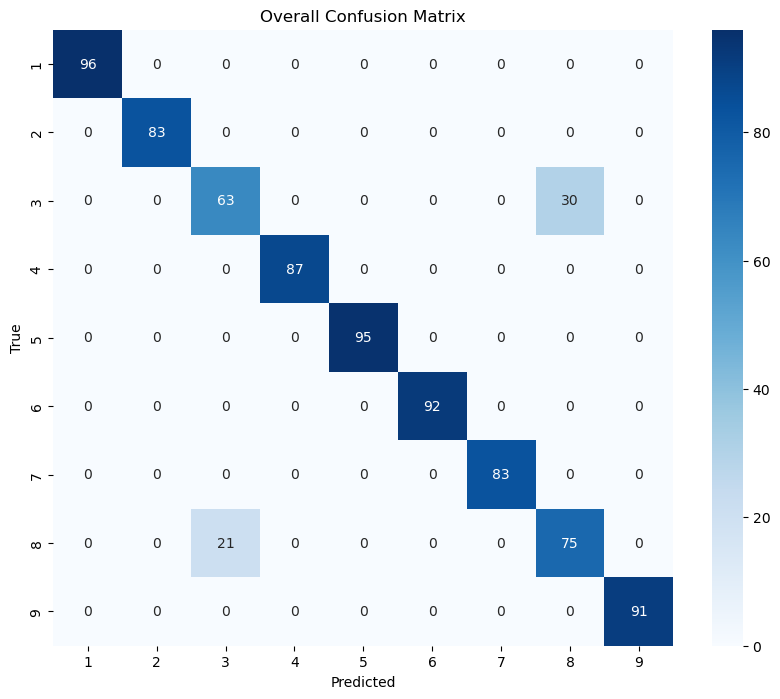

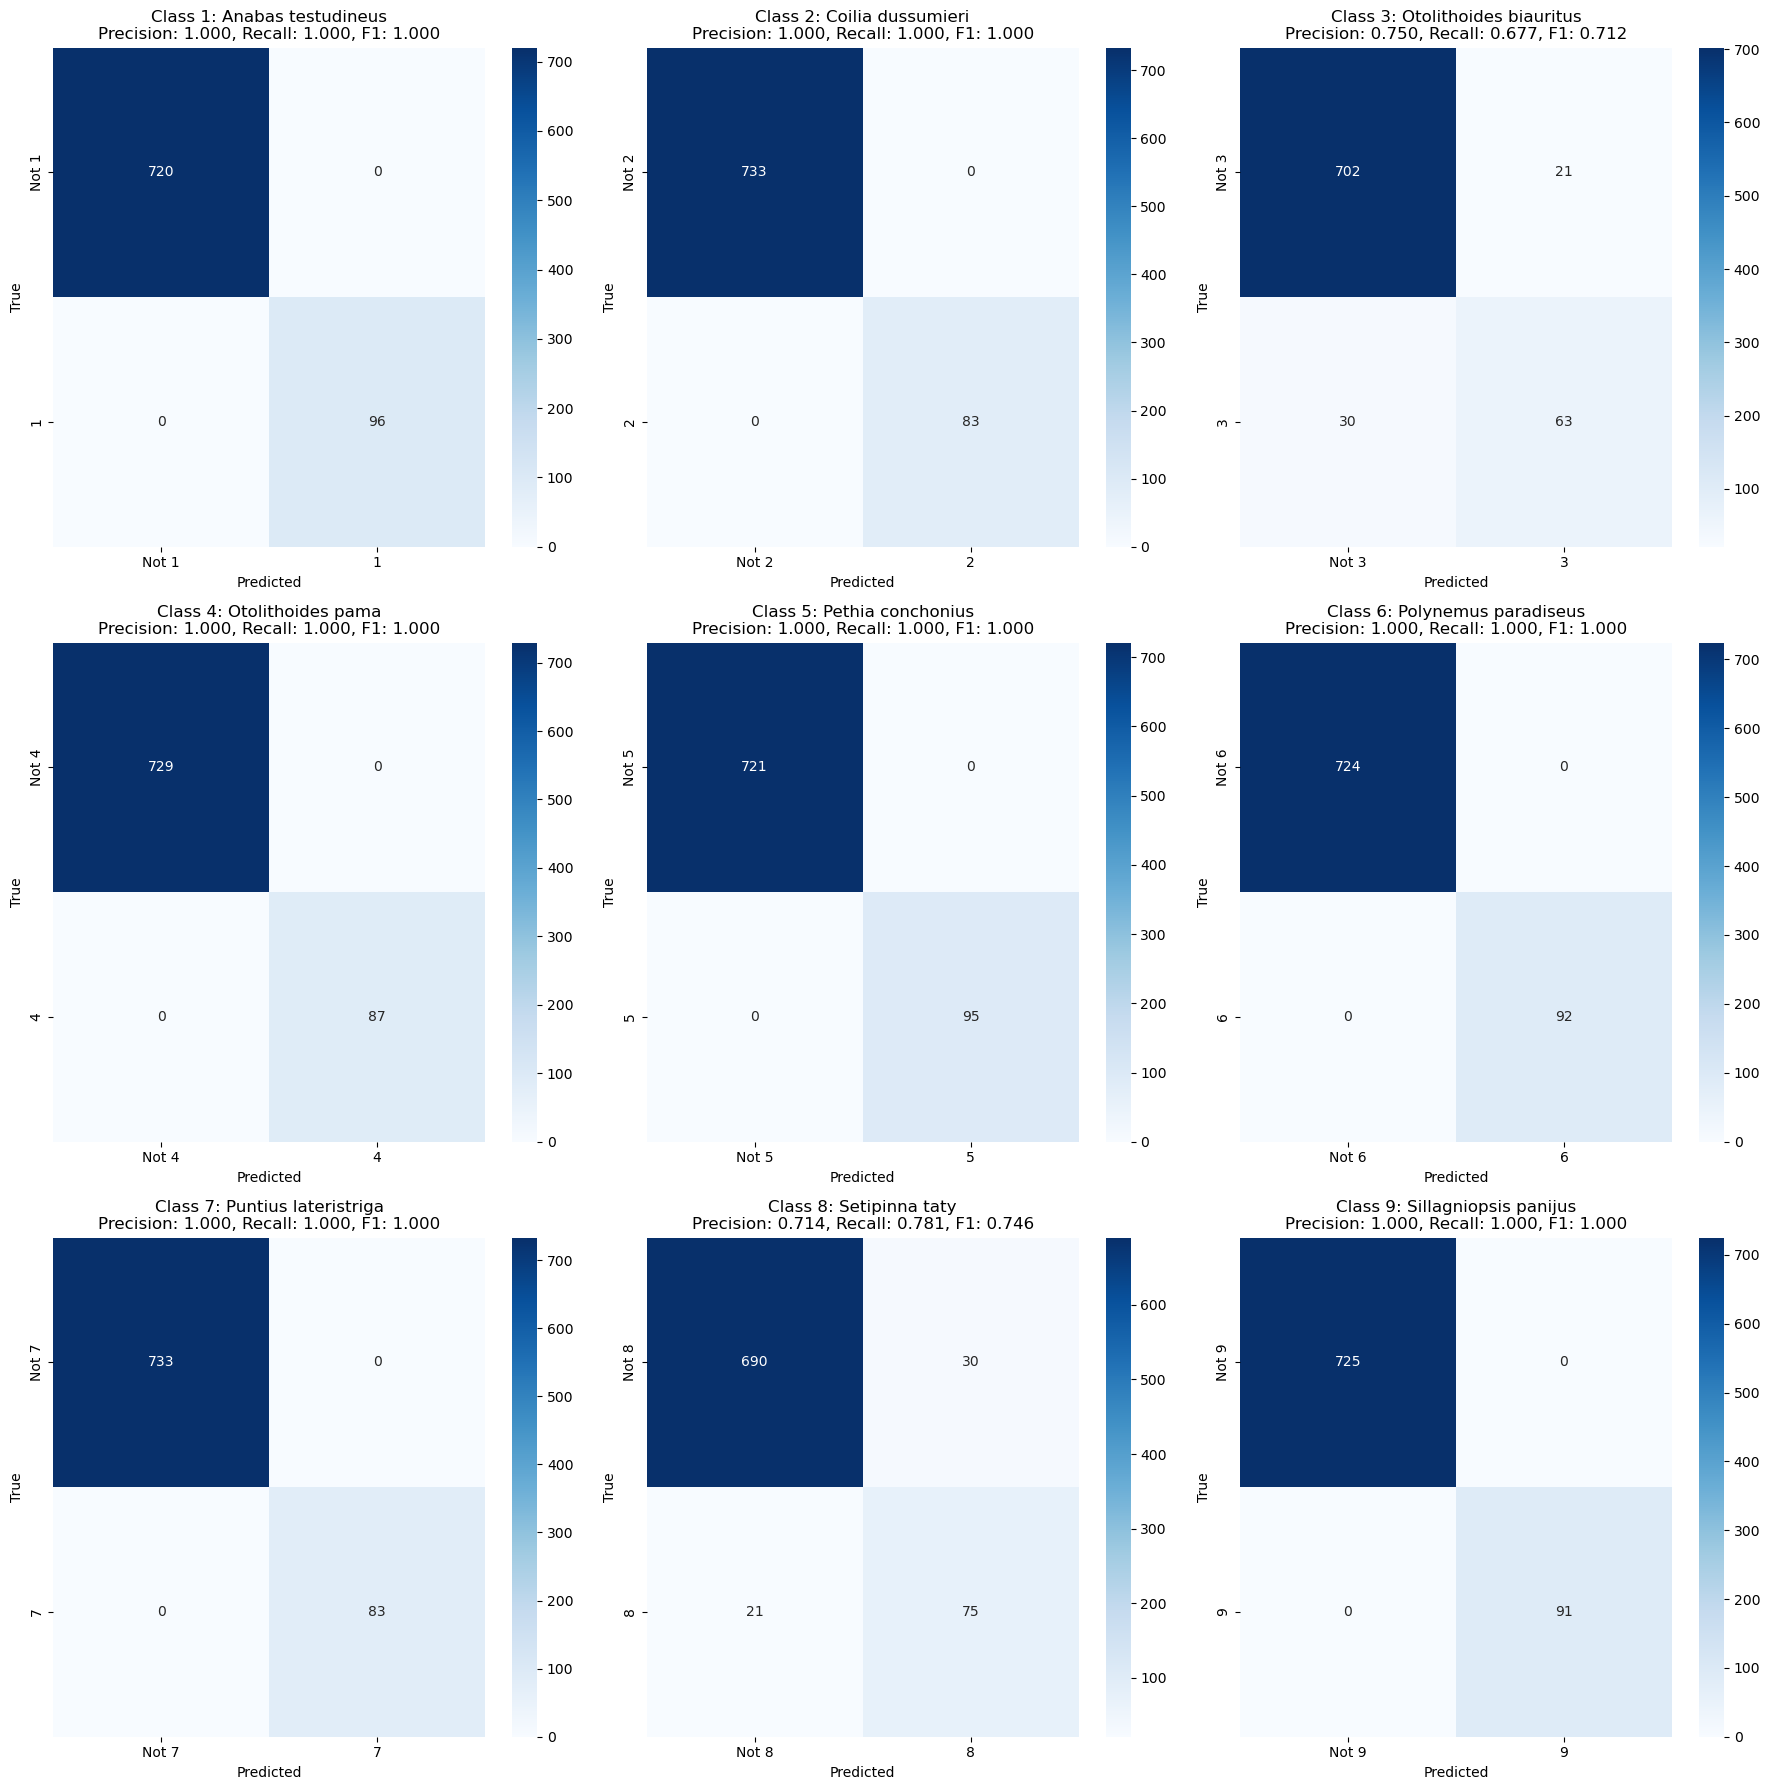

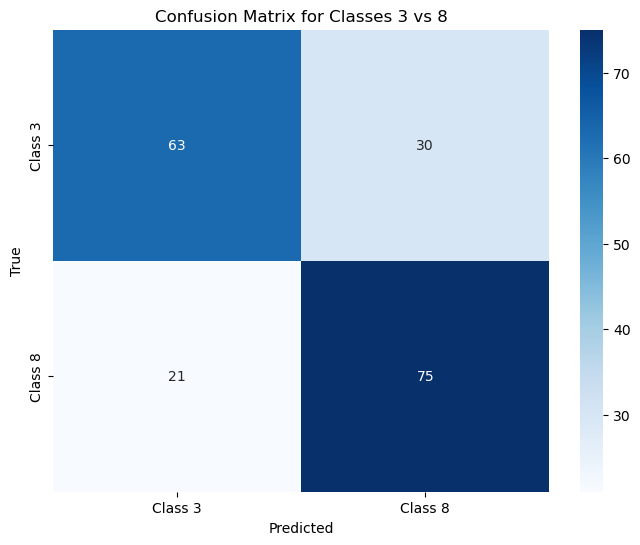


Accuracy for distinguishing between classes 3 and 8: 0.7302
              precision    recall  f1-score   support

           3       0.75      0.68      0.71        93
           8       0.71      0.78      0.75        96

    accuracy                           0.73       189
   macro avg       0.73      0.73      0.73       189
weighted avg       0.73      0.73      0.73       189



In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns

# Step 1: Split the dataset into train, validation, and test sets (60/20/20)
train_data, temp_data = train_test_split(df, test_size=0.4, stratify=df['col0_encoded'], random_state=42)
val_data, test_data = train_test_split(temp_data, test_size=0.5, stratify=temp_data['col0_encoded'], random_state=42)

print(f"Train set: {train_data.shape[0]} samples")
print(f"Validation set: {val_data.shape[0]} samples")
print(f"Test set: {test_data.shape[0]} samples")

# Step 2: Prepare features and target variable
X_train = train_data[['length', 'weight']]
y_train = train_data['col0_encoded']
X_val = val_data[['length', 'weight']]
y_val = val_data['col0_encoded']
X_test = test_data[['length', 'weight']]
y_test = test_data['col0_encoded']

# Step 3: Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train SVM with RBF kernel
print("Training SVM classifier...")
svm_classifier = SVC(kernel='rbf', C=10, gamma='scale', random_state=42)
svm_classifier.fit(X_train_scaled, y_train)

# Step 5: Evaluate on validation set
y_val_pred = svm_classifier.predict(X_val_scaled)
val_accuracy = accuracy_score(y_val, y_val_pred)
print(f"\nValidation Accuracy: {val_accuracy:.4f}")
print("\nValidation Classification Report:")
print(classification_report(y_val, y_val_pred))

# Step 6: Final evaluation on test set
y_test_pred = svm_classifier.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print("\nTest Classification Report:")
print(classification_report(y_test, y_test_pred))

# Step 7: Create overall confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
class_names = sorted(df['col0_encoded'].unique())

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Overall Confusion Matrix')
plt.show()

# Step 8: Create individual confusion matrices for each class (one-vs-rest approach)
species_names = {
    1: "Anabas testudineus",
    2: "Coilia dussumieri",
    3: "Otolithoides biauritus",
    4: "Otolithoides pama",
    5: "Pethia conchonius",
    6: "Polynemus paradiseus",
    7: "Puntius lateristriga",
    8: "Setipinna taty",
    9: "Sillagniopsis panijus"
}

# Create a figure with subplots for each class
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.flatten()

for i, class_id in enumerate(sorted(df['col0_encoded'].unique())):
    # Create binary labels for this class
    y_true_binary = (y_test == class_id).astype(int)
    y_pred_binary = (y_test_pred == class_id).astype(int)
    
    # Compute confusion matrix for this class
    cm_class = confusion_matrix(y_true_binary, y_pred_binary)
    
    # Plot the confusion matrix
    sns.heatmap(cm_class, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['Not ' + str(class_id), str(class_id)],
                yticklabels=['Not ' + str(class_id), str(class_id)],
                ax=axes[i])
    
    # Calculate metrics for this class
    tp = cm_class[1, 1]
    fp = cm_class[0, 1]
    fn = cm_class[1, 0]
    tn = cm_class[0, 0]
    
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    title = f"Class {class_id}: {species_names.get(class_id, '')}\n"
    title += f"Precision: {precision:.3f}, Recall: {recall:.3f}, F1: {f1:.3f}"
    axes[i].set_title(title)
    axes[i].set_xlabel('Predicted')
    axes[i].set_ylabel('True')

plt.tight_layout()
plt.show()

# Step 9: Analyze the specific challenge of differentiating between classes 3 and 8
# Extract only the samples from classes 3 and 8
test_3_8_mask = y_test.isin([3, 8])
y_test_3_8 = y_test[test_3_8_mask]
y_pred_3_8 = y_test_pred[test_3_8_mask]

# Create confusion matrix for classes 3 and 8 only
cm_3_8 = confusion_matrix(y_test_3_8, y_pred_3_8)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_3_8, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Class 3', 'Class 8'],
            yticklabels=['Class 3', 'Class 8'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Classes 3 vs 8')
plt.show()

# Accuracy for just classes 3 and 8
accuracy_3_8 = accuracy_score(y_test_3_8, y_pred_3_8)
print(f"\nAccuracy for distinguishing between classes 3 and 8: {accuracy_3_8:.4f}")
print(classification_report(y_test_3_8, y_pred_3_8))


Number of unique fish species: 9
Covariance type: full
  Silhouette Score: 0.6368
  AIC: 3574.64
  BIC: 3909.27
Covariance type: tied
  Silhouette Score: 0.6829
  AIC: 6474.59
  BIC: 6657.69
Covariance type: diag
  Silhouette Score: 0.6371
  AIC: 4622.12
  BIC: 4899.93
Covariance type: spherical
  Silhouette Score: 0.6833
  AIC: 7583.55
  BIC: 7804.53

Best model has full covariance type


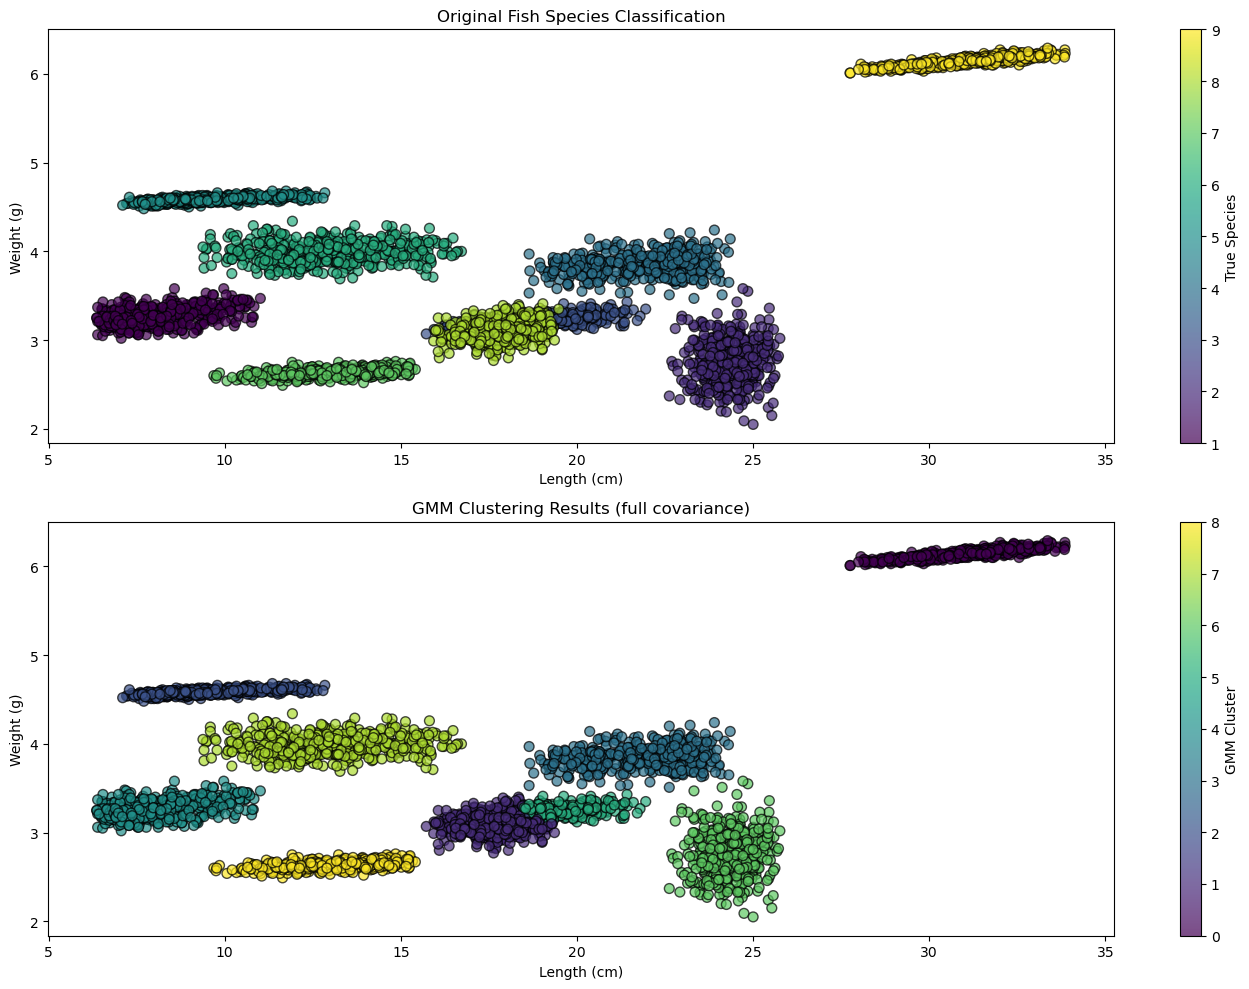

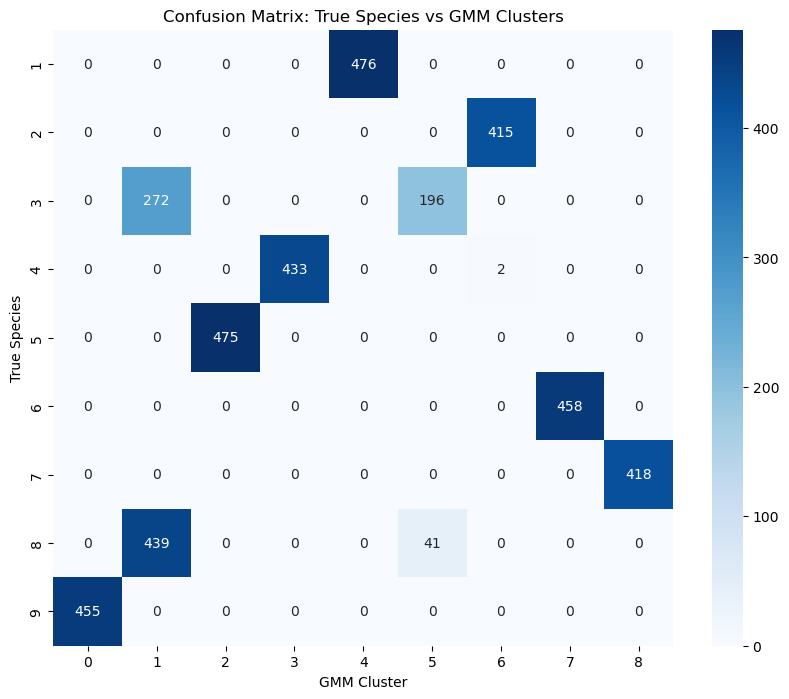

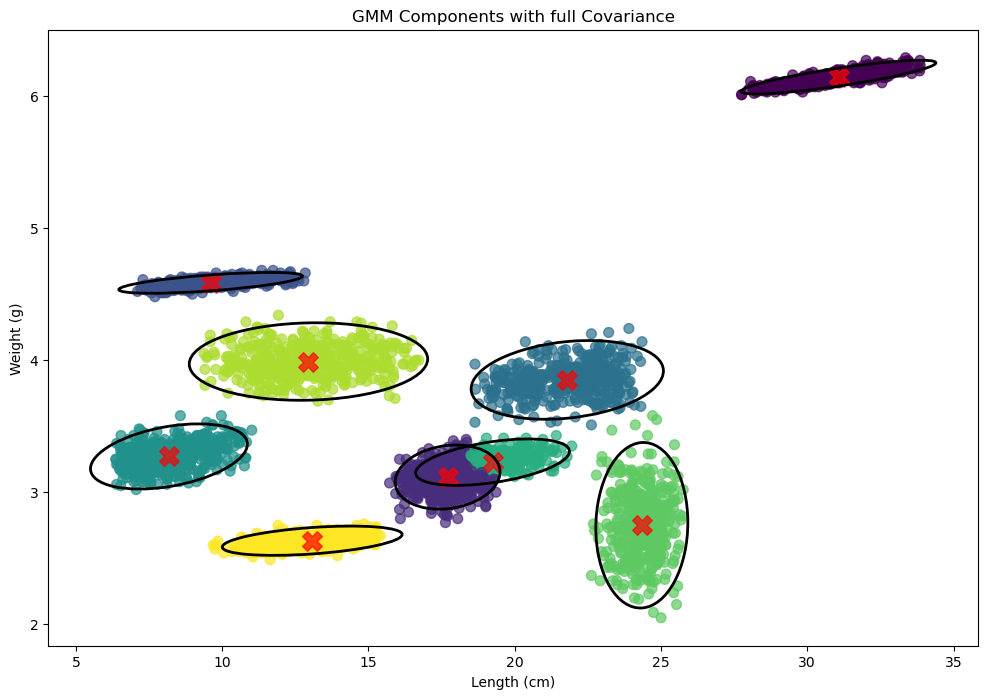

Clustering accuracy after optimal mapping: 0.0000


In [59]:
import numpy as np
import pandas as pd
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Prepare the data
X = df[['length', 'weight']]
y_true = df['col0_encoded']  # True species labels

# Standardize features (important for GMM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Fit Gaussian Mixture Model
n_components = len(df['col0_encoded'].unique())  # Should be 9 based on the scatter plot
print(f"Number of unique fish species: {n_components}")

# Test different covariance types to find optimal model
covariance_types = ['full', 'tied', 'diag', 'spherical']
results = {}

for cov_type in covariance_types:
    # Initialize and fit GMM
    gmm = GaussianMixture(
        n_components=n_components, 
        covariance_type=cov_type,
        random_state=42,
        n_init=10  # Multiple initializations to find best solution
    )
    gmm.fit(X_scaled)
    
    # Predict cluster labels
    labels = gmm.predict(X_scaled)
    
    # Calculate evaluation metrics
    silhouette_avg = silhouette_score(X_scaled, labels)
    aic = gmm.aic(X_scaled)
    bic = gmm.bic(X_scaled)
    
    # Store results
    results[cov_type] = {
        'model': gmm,
        'labels': labels,
        'silhouette': silhouette_avg,
        'aic': aic,
        'bic': bic
    }
    
    print(f"Covariance type: {cov_type}")
    print(f"  Silhouette Score: {silhouette_avg:.4f}")
    print(f"  AIC: {aic:.2f}")
    print(f"  BIC: {bic:.2f}")

# Step 3: Select best model based on BIC (lower is better)
best_cov_type = min(results, key=lambda x: results[x]['bic'])
best_model = results[best_cov_type]['model']
best_labels = results[best_cov_type]['labels']

print(f"\nBest model has {best_cov_type} covariance type")

# Step 4: Analyze clustering results
results_df = pd.DataFrame({
    'length': X['length'],
    'weight': X['weight'],
    'true_species': y_true,
    'cluster': best_labels
})

# Step 5: Visualize clusters
plt.figure(figsize=(14, 10))

# Plot original species
plt.subplot(2, 1, 1)
scatter = plt.scatter(
    X['length'], 
    X['weight'], 
    c=y_true, 
    cmap='viridis', 
    s=50, 
    alpha=0.7,
    edgecolor='k'
)
plt.colorbar(scatter, label='True Species')
plt.title('Original Fish Species Classification')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')

# Plot GMM clusters
plt.subplot(2, 1, 2)
scatter = plt.scatter(
    X['length'], 
    X['weight'], 
    c=best_labels, 
    cmap='viridis', 
    s=50, 
    alpha=0.7,
    edgecolor='k'
)
plt.colorbar(scatter, label='GMM Cluster')
plt.title(f'GMM Clustering Results ({best_cov_type} covariance)')
plt.xlabel('Length (cm)')
plt.ylabel('Weight (g)')

plt.tight_layout()
plt.show()

# Step 6: Analyze correspondence between true species and clusters
confusion = pd.crosstab(
    results_df['true_species'], 
    results_df['cluster'],
    rownames=['True Species'],
    colnames=['GMM Cluster']
)

plt.figure(figsize=(10, 8))
sns.heatmap(confusion, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix: True Species vs GMM Clusters')
plt.show()

# Step 7: Visualize GMM component distributions
def plot_gmm_ellipses(gmm, X, labels):
    # Plot data with cluster assignments
    plt.figure(figsize=(12, 8))
    plt.scatter(X['length'], X['weight'], c=labels, s=50, cmap='viridis', alpha=0.7)
    
    # Get cluster centers and convert back to original scale
    means = scaler.inverse_transform(gmm.means_)
    
    # Plot cluster centers
    plt.scatter(means[:, 0], means[:, 1], c='red', s=200, alpha=0.7, marker='X')
    
    # Plot ellipses for full or tied covariance types
    if gmm.covariance_type in ['full', 'tied']:
        from matplotlib.patches import Ellipse
        
        for i in range(n_components):
            if gmm.covariance_type == 'full':
                covar = gmm.covariances_[i]
            else:  # tied
                covar = gmm.covariances_
                
            # Scale covariance to data coordinates
            covar_scaled = scaler.scale_[:, np.newaxis] * covar * scaler.scale_
            
            # Get eigenvalues and eigenvectors
            evals, evecs = np.linalg.eigh(covar_scaled)
            
            # Calculate ellipse parameters (95% confidence)
            angle = np.arctan2(evecs[1, 0], evecs[0, 0]) * 180 / np.pi
            width, height = 2 * np.sqrt(5.991 * evals)  # 5.991 is chi-square value for 95% confidence
            
            # Create and add ellipse
            ellipse = Ellipse(
                xy=means[i],
                width=width,
                height=height,
                angle=angle,
                edgecolor='black',
                fc='none',
                lw=2
            )
            plt.gca().add_patch(ellipse)
    
    plt.title(f'GMM Components with {gmm.covariance_type} Covariance')
    plt.xlabel('Length (cm)')
    plt.ylabel('Weight (g)')
    plt.show()

# Plot GMM components
plot_gmm_ellipses(best_model, X, best_labels)

# Step 8: Evaluate cluster quality by comparing with true species
# Try to map clusters to original species
from scipy.optimize import linear_sum_assignment

# Create a cost matrix based on how many points of each species are in each cluster
cost_matrix = -confusion.values  # Negative because we want to maximize overlap
row_ind, col_ind = linear_sum_assignment(cost_matrix)

# Create a mapping from cluster to most likely species
cluster_to_species = {col_ind[i]: row_ind[i] for i in range(len(row_ind))}

# Apply mapping to get adjusted labels
mapped_labels = np.array([cluster_to_species[label] for label in best_labels])

# Calculate accuracy after mapping
accuracy = accuracy_score(y_true, mapped_labels)
print(f"Clustering accuracy after optimal mapping: {accuracy:.4f}")
